In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((25*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((25*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(105, 100, 100)


In [17]:
print(y_test.shape)

(45, 100, 100)


In [18]:
print(x_train.shape)

(105, 15, 1)


In [19]:
print(x_test.shape)

(45, 15, 1)


In [20]:
theta_train.shape

(105,)

In [21]:
tsr_train.shape

(105,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((105, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((45, 2, 1))

In [28]:
tsr_theta_train.shape

(105, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
3/3 [==============================] - 1s 5ms/step - loss: 0.0334 - rmse: 0.1827
Epoch 2/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0287 - rmse: 0.1695
Epoch 3/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1622
Epoch 4/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0254 - rmse: 0.1592
Epoch 5/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 6/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0252 - rmse: 0.1586
Epoch 7/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0252 - rmse: 0.1589
Epoch 8/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0252 - rmse: 0.1588
Epoch 9/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 10/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1581
Epoch 11/10000
3/3 [=============================

3/3 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1557
Epoch 87/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 88/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0242 - rmse: 0.1557
Epoch 89/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 90/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 91/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0242 - rmse: 0.1556
Epoch 92/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 93/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 94/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1554
Epoch 95/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 96/10000
3/3 [==============================] - 0

3/3 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1505
Epoch 171/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0226 - rmse: 0.1505
Epoch 172/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0226 - rmse: 0.1505
Epoch 173/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 174/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1503
Epoch 175/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1505
Epoch 176/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1501
Epoch 177/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1500
Epoch 178/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1501
Epoch 179/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0226 - rmse: 0.1502
Epoch 180/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 255/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 256/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 257/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 258/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1462
Epoch 259/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1461
Epoch 260/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0213 - rmse: 0.1459
Epoch 261/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0213 - rmse: 0.1461
Epoch 262/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 263/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0214 - rmse: 0.1461
Epoch 264/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 339/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0207 - rmse: 0.1440
Epoch 340/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 341/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1456
Epoch 342/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1440
Epoch 343/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 344/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0208 - rmse: 0.1442
Epoch 345/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1443
Epoch 346/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0204 - rmse: 0.1430
Epoch 347/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1439
Epoch 348/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 423/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 424/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 425/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 426/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 427/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 428/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0190 - rmse: 0.1379
Epoch 429/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 430/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1378
Epoch 431/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1376
Epoch 432/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 507/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 508/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 509/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 510/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 511/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 512/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 513/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 514/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 515/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 516/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 591/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1139
Epoch 592/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1133
Epoch 593/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 594/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1138
Epoch 595/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 596/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1135
Epoch 597/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1120
Epoch 598/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 599/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1121
Epoch 600/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 675/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 676/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 677/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 678/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 679/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0956
Epoch 680/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 681/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0944
Epoch 682/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 683/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 684/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 759/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 760/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 761/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 762/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 763/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 764/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 765/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 766/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 767/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 768/10000
3/3 [=========================

3/3 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 843/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 844/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 845/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 846/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 847/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 848/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0712
Epoch 849/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 850/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 851/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 852/10000
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 927/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 928/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 929/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 930/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 931/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 932/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 933/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0612
Epoch 934/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 935/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 936/10000
3/3 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 1011/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 1012/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 1013/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1014/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1015/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 1016/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1017/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1018/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1019/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 1020/10000
3/3 [===============

3/3 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1094/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 1095/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 1096/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 1097/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1098/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 1099/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 1100/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0442
Epoch 1101/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 1102/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 1103/10000
3/3 [===============

3/3 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 1177/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 1178/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 1179/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1180/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1181/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 1182/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 1183/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 1184/10000
3/3 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 1185/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 1186/10000
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 9.6016e-04 - rmse: 0.0310
Epoch 1260/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7710e-04 - rmse: 0.0313
Epoch 1261/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.7497e-04 - rmse: 0.0312
Epoch 1262/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.6455e-04 - rmse: 0.0311
Epoch 1263/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.2296e-04 - rmse: 0.0304
Epoch 1264/10000
3/3 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 1265/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.7765e-04 - rmse: 0.0313
Epoch 1266/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.3898e-04 - rmse: 0.0306
Epoch 1267/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7970e-04 - rmse: 0.0313
Epoch 1268/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.8095e-04 - rmse: 0.0313
E

3/3 [==============================] - 0s 4ms/step - loss: 6.8868e-04 - rmse: 0.0262
Epoch 1340/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.7773e-04 - rmse: 0.0260
Epoch 1341/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.8550e-04 - rmse: 0.0262
Epoch 1342/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.0340e-04 - rmse: 0.0265
Epoch 1343/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.6001e-04 - rmse: 0.0257
Epoch 1344/10000
3/3 [==============================] - 0s 3ms/step - loss: 6.7835e-04 - rmse: 0.0260
Epoch 1345/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.7714e-04 - rmse: 0.0260
Epoch 1346/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.9501e-04 - rmse: 0.0264
Epoch 1347/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.4505e-04 - rmse: 0.0254
Epoch 1348/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.9368e-04 - rmse: 0.02

3/3 [==============================] - 0s 5ms/step - loss: 4.8372e-04 - rmse: 0.0220
Epoch 1420/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.9936e-04 - rmse: 0.0223
Epoch 1421/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.9372e-04 - rmse: 0.0222
Epoch 1422/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8130e-04 - rmse: 0.0219
Epoch 1423/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7687e-04 - rmse: 0.0218
Epoch 1424/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7639e-04 - rmse: 0.0218
Epoch 1425/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.9589e-04 - rmse: 0.0223
Epoch 1426/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7979e-04 - rmse: 0.0219
Epoch 1427/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.9190e-04 - rmse: 0.0222
Epoch 1428/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7145e-04 - rmse: 0.02

3/3 [==============================] - 0s 4ms/step - loss: 3.6545e-04 - rmse: 0.0191
Epoch 1500/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6352e-04 - rmse: 0.0191
Epoch 1501/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5281e-04 - rmse: 0.0188
Epoch 1502/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5753e-04 - rmse: 0.0189
Epoch 1503/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6495e-04 - rmse: 0.0191
Epoch 1504/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5191e-04 - rmse: 0.0188
Epoch 1505/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5543e-04 - rmse: 0.0189
Epoch 1506/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5484e-04 - rmse: 0.0188
Epoch 1507/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4761e-04 - rmse: 0.0186
Epoch 1508/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4741e-04 - rmse: 0.01

3/3 [==============================] - 0s 5ms/step - loss: 2.8672e-04 - rmse: 0.0169
Epoch 1580/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.8863e-04 - rmse: 0.0170
Epoch 1581/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.7392e-04 - rmse: 0.0166
Epoch 1582/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7942e-04 - rmse: 0.0167
Epoch 1583/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7402e-04 - rmse: 0.0166
Epoch 1584/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7893e-04 - rmse: 0.0167
Epoch 1585/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8006e-04 - rmse: 0.0167
Epoch 1586/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.6232e-04 - rmse: 0.0162
Epoch 1587/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6669e-04 - rmse: 0.0163
Epoch 1588/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6862e-04 - rmse: 0.01

3/3 [==============================] - 0s 5ms/step - loss: 2.1533e-04 - rmse: 0.0147
Epoch 1660/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2176e-04 - rmse: 0.0149
Epoch 1661/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1544e-04 - rmse: 0.0147
Epoch 1662/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1524e-04 - rmse: 0.0147
Epoch 1663/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0124e-04 - rmse: 0.0142
Epoch 1664/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.0759e-04 - rmse: 0.0144
Epoch 1665/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0206e-04 - rmse: 0.0142
Epoch 1666/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0300e-04 - rmse: 0.0142
Epoch 1667/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0430e-04 - rmse: 0.0143
Epoch 1668/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.0262e-04 - rmse: 0.01

3/3 [==============================] - 0s 4ms/step - loss: 1.5041e-04 - rmse: 0.0123
Epoch 1740/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5155e-04 - rmse: 0.0123
Epoch 1741/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5305e-04 - rmse: 0.0124
Epoch 1742/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.5183e-04 - rmse: 0.0123
Epoch 1743/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5542e-04 - rmse: 0.0125
Epoch 1744/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5081e-04 - rmse: 0.0123
Epoch 1745/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5812e-04 - rmse: 0.0126
Epoch 1746/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6245e-04 - rmse: 0.0127
Epoch 1747/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7367e-04 - rmse: 0.0132
Epoch 1748/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5387e-04 - rmse: 0.01

3/3 [==============================] - 0s 4ms/step - loss: 1.2620e-04 - rmse: 0.0112
Epoch 1820/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2111e-04 - rmse: 0.0110
Epoch 1821/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2325e-04 - rmse: 0.0111
Epoch 1822/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2092e-04 - rmse: 0.0110
Epoch 1823/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2506e-04 - rmse: 0.0112
Epoch 1824/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2530e-04 - rmse: 0.0112
Epoch 1825/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2637e-04 - rmse: 0.0112
Epoch 1826/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2183e-04 - rmse: 0.0110
Epoch 1827/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2224e-04 - rmse: 0.0111
Epoch 1828/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2937e-04 - rmse: 0.01

3/3 [==============================] - 0s 4ms/step - loss: 1.1159e-04 - rmse: 0.0106
Epoch 1900/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0705e-04 - rmse: 0.0103
Epoch 1901/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0534e-04 - rmse: 0.0103
Epoch 1902/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.1428e-04 - rmse: 0.0107
Epoch 1903/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0869e-04 - rmse: 0.0104
Epoch 1904/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0246e-04 - rmse: 0.0101
Epoch 1905/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0654e-04 - rmse: 0.0103
Epoch 1906/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0244e-04 - rmse: 0.0101
Epoch 1907/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.6868e-05 - rmse: 0.0098
Epoch 1908/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8704e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 8.5321e-05 - rmse: 0.0092
Epoch 1980/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.9914e-05 - rmse: 0.0095
Epoch 1981/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.1506e-05 - rmse: 0.0096
Epoch 1982/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.5846e-05 - rmse: 0.0093
Epoch 1983/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.7750e-05 - rmse: 0.0094
Epoch 1984/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8354e-05 - rmse: 0.0094
Epoch 1985/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.9514e-05 - rmse: 0.0089
Epoch 1986/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.7778e-05 - rmse: 0.0094
Epoch 1987/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.3610e-05 - rmse: 0.0097
Epoch 1988/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.5234e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 7.4026e-05 - rmse: 0.0086
Epoch 2060/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.2521e-05 - rmse: 0.0085
Epoch 2061/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.4272e-05 - rmse: 0.0086
Epoch 2062/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.0920e-05 - rmse: 0.0084
Epoch 2063/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.3817e-05 - rmse: 0.0086
Epoch 2064/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.9297e-05 - rmse: 0.0089
Epoch 2065/10000
3/3 [==============================] - 0s 3ms/step - loss: 9.1284e-05 - rmse: 0.0096
Epoch 2066/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.5796e-05 - rmse: 0.0093
Epoch 2067/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3859e-05 - rmse: 0.0092
Epoch 2068/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.9625e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 5.7640e-05 - rmse: 0.0076
Epoch 2140/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9341e-05 - rmse: 0.0077
Epoch 2141/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.4656e-05 - rmse: 0.0080
Epoch 2142/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9369e-05 - rmse: 0.0077
Epoch 2143/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4117e-05 - rmse: 0.0074
Epoch 2144/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.3393e-05 - rmse: 0.0073
Epoch 2145/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4810e-05 - rmse: 0.0074
Epoch 2146/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.7287e-05 - rmse: 0.0076
Epoch 2147/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.3735e-05 - rmse: 0.0073
Epoch 2148/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4601e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 5.4128e-05 - rmse: 0.0074
Epoch 2220/10000
3/3 [==============================] - 0s 3ms/step - loss: 5.5067e-05 - rmse: 0.0074
Epoch 2221/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4187e-05 - rmse: 0.0074
Epoch 2222/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2590e-05 - rmse: 0.0073
Epoch 2223/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.6926e-05 - rmse: 0.0075
Epoch 2224/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4005e-05 - rmse: 0.0073
Epoch 2225/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1136e-05 - rmse: 0.0072
Epoch 2226/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7471e-05 - rmse: 0.0069
Epoch 2227/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7969e-05 - rmse: 0.0069
Epoch 2228/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.5717e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 4.3938e-05 - rmse: 0.0066
Epoch 2300/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7881e-05 - rmse: 0.0069
Epoch 2301/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1762e-05 - rmse: 0.0072
Epoch 2302/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8539e-05 - rmse: 0.0077
Epoch 2303/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2635e-05 - rmse: 0.0073
Epoch 2304/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.1133e-05 - rmse: 0.0078
Epoch 2305/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8010e-05 - rmse: 0.0076
Epoch 2306/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8337e-05 - rmse: 0.0076
Epoch 2307/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3917e-05 - rmse: 0.0092
Epoch 2308/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.4458e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 4.2700e-05 - rmse: 0.0065
Epoch 2380/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2124e-05 - rmse: 0.0065
Epoch 2381/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0141e-05 - rmse: 0.0063
Epoch 2382/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.1365e-05 - rmse: 0.0064
Epoch 2383/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.3712e-05 - rmse: 0.0066
Epoch 2384/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1422e-05 - rmse: 0.0064
Epoch 2385/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0555e-05 - rmse: 0.0064
Epoch 2386/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.8543e-05 - rmse: 0.0070
Epoch 2387/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1990e-05 - rmse: 0.0072
Epoch 2388/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8453e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.4658e-05 - rmse: 0.0059
Epoch 2460/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4159e-05 - rmse: 0.0058
Epoch 2461/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1856e-05 - rmse: 0.0056
Epoch 2462/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4671e-05 - rmse: 0.0059
Epoch 2463/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1329e-05 - rmse: 0.0056
Epoch 2464/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1337e-05 - rmse: 0.0056
Epoch 2465/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3855e-05 - rmse: 0.0058
Epoch 2466/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2821e-05 - rmse: 0.0057
Epoch 2467/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6366e-05 - rmse: 0.0060
Epoch 2468/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2439e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.0408e-05 - rmse: 0.0055
Epoch 2540/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0037e-05 - rmse: 0.0055
Epoch 2541/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.9298e-05 - rmse: 0.0054
Epoch 2542/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.0756e-05 - rmse: 0.0055
Epoch 2543/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8124e-05 - rmse: 0.0053
Epoch 2544/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9583e-05 - rmse: 0.0054
Epoch 2545/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.3219e-05 - rmse: 0.0058
Epoch 2546/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5610e-05 - rmse: 0.0060
Epoch 2547/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5064e-05 - rmse: 0.0059
Epoch 2548/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3168e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.1606e-05 - rmse: 0.0056
Epoch 2620/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1611e-05 - rmse: 0.0056
Epoch 2621/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.3263e-05 - rmse: 0.0058
Epoch 2622/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.7665e-05 - rmse: 0.0061
Epoch 2623/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.3055e-05 - rmse: 0.0066
Epoch 2624/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6157e-05 - rmse: 0.0068
Epoch 2625/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.1050e-05 - rmse: 0.0064
Epoch 2626/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.5564e-05 - rmse: 0.0075
Epoch 2627/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7283e-05 - rmse: 0.0076
Epoch 2628/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0723e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.9104e-05 - rmse: 0.0054
Epoch 2700/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6921e-05 - rmse: 0.0052
Epoch 2701/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7911e-05 - rmse: 0.0053
Epoch 2702/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6511e-05 - rmse: 0.0051
Epoch 2703/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9112e-05 - rmse: 0.0054
Epoch 2704/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9615e-05 - rmse: 0.0054
Epoch 2705/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2875e-05 - rmse: 0.0057
Epoch 2706/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2684e-05 - rmse: 0.0057
Epoch 2707/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0272e-05 - rmse: 0.0055
Epoch 2708/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2874e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.9395e-05 - rmse: 0.0054
Epoch 2780/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7772e-05 - rmse: 0.0053
Epoch 2781/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.5798e-05 - rmse: 0.0051
Epoch 2782/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5282e-05 - rmse: 0.0050
Epoch 2783/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1997e-05 - rmse: 0.0047
Epoch 2784/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1358e-05 - rmse: 0.0046
Epoch 2785/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1321e-05 - rmse: 0.0046
Epoch 2786/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4140e-05 - rmse: 0.0049
Epoch 2787/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3182e-05 - rmse: 0.0058
Epoch 2788/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7508e-05 - rmse: 0.00

3/3 [==============================] - 0s 3ms/step - loss: 8.9249e-05 - rmse: 0.0094
Epoch 2860/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0828e-05 - rmse: 0.0071
Epoch 2861/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.8534e-05 - rmse: 0.0089
Epoch 2862/10000
3/3 [==============================] - 0s 3ms/step - loss: 5.8617e-05 - rmse: 0.0077
Epoch 2863/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.7502e-05 - rmse: 0.0076
Epoch 2864/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5243e-05 - rmse: 0.0067
Epoch 2865/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9497e-05 - rmse: 0.0063
Epoch 2866/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0827e-05 - rmse: 0.0071
Epoch 2867/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1706e-05 - rmse: 0.0065
Epoch 2868/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9532e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.4023e-05 - rmse: 0.0049
Epoch 2940/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7606e-05 - rmse: 0.0053
Epoch 2941/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7225e-05 - rmse: 0.0052
Epoch 2942/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9145e-05 - rmse: 0.0054
Epoch 2943/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8428e-05 - rmse: 0.0062
Epoch 2944/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.4777e-05 - rmse: 0.0067
Epoch 2945/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0363e-05 - rmse: 0.0064
Epoch 2946/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4988e-05 - rmse: 0.0059
Epoch 2947/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.5277e-05 - rmse: 0.0059
Epoch 2948/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.9991e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.2980e-05 - rmse: 0.0048
Epoch 3020/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9984e-05 - rmse: 0.0045
Epoch 3021/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2747e-05 - rmse: 0.0048
Epoch 3022/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4641e-05 - rmse: 0.0050
Epoch 3023/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1763e-05 - rmse: 0.0047
Epoch 3024/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7049e-05 - rmse: 0.0041
Epoch 3025/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.6180e-05 - rmse: 0.0040
Epoch 3026/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6989e-05 - rmse: 0.0041
Epoch 3027/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1173e-05 - rmse: 0.0046
Epoch 3028/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3870e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.1639e-05 - rmse: 0.0047
Epoch 3100/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1055e-05 - rmse: 0.0046
Epoch 3101/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2343e-05 - rmse: 0.0057
Epoch 3102/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9387e-05 - rmse: 0.0063
Epoch 3103/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5232e-05 - rmse: 0.0059
Epoch 3104/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2123e-05 - rmse: 0.0065
Epoch 3105/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5672e-05 - rmse: 0.0060
Epoch 3106/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6127e-05 - rmse: 0.0060
Epoch 3107/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9475e-05 - rmse: 0.0063
Epoch 3108/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.7300e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.7498e-05 - rmse: 0.0042
Epoch 3180/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7115e-05 - rmse: 0.0041
Epoch 3181/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2164e-05 - rmse: 0.0047
Epoch 3182/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0138e-05 - rmse: 0.0045
Epoch 3183/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4188e-05 - rmse: 0.0049
Epoch 3184/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.4758e-05 - rmse: 0.0050
Epoch 3185/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1981e-05 - rmse: 0.0047
Epoch 3186/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0421e-05 - rmse: 0.0045
Epoch 3187/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9000e-05 - rmse: 0.0044
Epoch 3188/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.7452e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 5.1587e-05 - rmse: 0.0072
Epoch 3260/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2872e-05 - rmse: 0.0065
Epoch 3261/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5222e-05 - rmse: 0.0059
Epoch 3262/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0743e-05 - rmse: 0.0064
Epoch 3263/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6093e-05 - rmse: 0.0068
Epoch 3264/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8454e-05 - rmse: 0.0076
Epoch 3265/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2380e-05 - rmse: 0.0065
Epoch 3266/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1865e-05 - rmse: 0.0072
Epoch 3267/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0445e-05 - rmse: 0.0071
Epoch 3268/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.0255e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 1.3570e-05 - rmse: 0.0037
Epoch 3340/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.5081e-05 - rmse: 0.0039
Epoch 3341/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3391e-05 - rmse: 0.0037
Epoch 3342/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3815e-05 - rmse: 0.0037
Epoch 3343/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.3742e-05 - rmse: 0.0037
Epoch 3344/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3640e-05 - rmse: 0.0037
Epoch 3345/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4754e-05 - rmse: 0.0038
Epoch 3346/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3859e-05 - rmse: 0.0037
Epoch 3347/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.4321e-05 - rmse: 0.0038
Epoch 3348/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3766e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.1067e-05 - rmse: 0.0033
Epoch 3420/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1380e-05 - rmse: 0.0034
Epoch 3421/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1735e-05 - rmse: 0.0034
Epoch 3422/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1933e-05 - rmse: 0.0035
Epoch 3423/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2157e-05 - rmse: 0.0035
Epoch 3424/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2017e-05 - rmse: 0.0035
Epoch 3425/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1251e-05 - rmse: 0.0034
Epoch 3426/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2900e-05 - rmse: 0.0036
Epoch 3427/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2710e-05 - rmse: 0.0036
Epoch 3428/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5605e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.5486e-05 - rmse: 0.0060
Epoch 3500/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0566e-05 - rmse: 0.0064
Epoch 3501/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1928e-05 - rmse: 0.0065
Epoch 3502/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4476e-05 - rmse: 0.0059
Epoch 3503/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0122e-05 - rmse: 0.0055
Epoch 3504/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5732e-05 - rmse: 0.0051
Epoch 3505/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9559e-05 - rmse: 0.0044
Epoch 3506/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9192e-05 - rmse: 0.0044
Epoch 3507/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9330e-05 - rmse: 0.0044
Epoch 3508/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6428e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.6848e-05 - rmse: 0.0061
Epoch 3580/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6723e-05 - rmse: 0.0052
Epoch 3581/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0448e-05 - rmse: 0.0055
Epoch 3582/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4984e-05 - rmse: 0.0050
Epoch 3583/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5579e-05 - rmse: 0.0051
Epoch 3584/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1220e-05 - rmse: 0.0056
Epoch 3585/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3561e-05 - rmse: 0.0058
Epoch 3586/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1973e-05 - rmse: 0.0057
Epoch 3587/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0713e-05 - rmse: 0.0055
Epoch 3588/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.5275e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.2696e-04 - rmse: 0.0113
Epoch 3660/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1451e-04 - rmse: 0.0107
Epoch 3661/10000
3/3 [==============================] - 0s 3ms/step - loss: 8.2151e-05 - rmse: 0.0091
Epoch 3662/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.7517e-05 - rmse: 0.0088
Epoch 3663/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2050e-05 - rmse: 0.0072
Epoch 3664/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8131e-05 - rmse: 0.0076
Epoch 3665/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7335e-05 - rmse: 0.0069
Epoch 3666/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4025e-05 - rmse: 0.0074
Epoch 3667/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2521e-05 - rmse: 0.0065
Epoch 3668/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.9659e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.2414e-05 - rmse: 0.0035
Epoch 3740/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2339e-05 - rmse: 0.0035
Epoch 3741/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7571e-06 - rmse: 0.0031
Epoch 3742/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.0272e-06 - rmse: 0.0030
Epoch 3743/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.9818e-06 - rmse: 0.0030
Epoch 3744/10000
3/3 [==============================] - 0s 3ms/step - loss: 8.8349e-06 - rmse: 0.0030
Epoch 3745/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.6053e-06 - rmse: 0.0029
Epoch 3746/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.9513e-06 - rmse: 0.0030
Epoch 3747/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7664e-06 - rmse: 0.0031
Epoch 3748/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.0284e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.0755e-05 - rmse: 0.0033
Epoch 3820/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.0214e-05 - rmse: 0.0032
Epoch 3821/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.9925e-06 - rmse: 0.0030
Epoch 3822/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5339e-06 - rmse: 0.0031
Epoch 3823/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5899e-06 - rmse: 0.0031
Epoch 3824/10000
3/3 [==============================] - 0s 3ms/step - loss: 8.4562e-06 - rmse: 0.0029
Epoch 3825/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.4306e-06 - rmse: 0.0031
Epoch 3826/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3571e-06 - rmse: 0.0029
Epoch 3827/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3705e-06 - rmse: 0.0029
Epoch 3828/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.5969e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 4.1725e-05 - rmse: 0.0065
Epoch 3900/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.8497e-05 - rmse: 0.0053
Epoch 3901/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5608e-05 - rmse: 0.0051
Epoch 3902/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4519e-05 - rmse: 0.0050
Epoch 3903/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7654e-05 - rmse: 0.0053
Epoch 3904/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3139e-05 - rmse: 0.0048
Epoch 3905/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3545e-05 - rmse: 0.0058
Epoch 3906/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4589e-05 - rmse: 0.0050
Epoch 3907/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3985e-05 - rmse: 0.0058
Epoch 3908/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8340e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 5.5664e-05 - rmse: 0.0075
Epoch 3980/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9542e-05 - rmse: 0.0077
Epoch 3981/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.5520e-05 - rmse: 0.0075
Epoch 3982/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.6883e-05 - rmse: 0.0082
Epoch 3983/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.2173e-05 - rmse: 0.0072
Epoch 3984/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.7750e-05 - rmse: 0.0082
Epoch 3985/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.0302e-05 - rmse: 0.0078
Epoch 3986/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9027e-05 - rmse: 0.0062
Epoch 3987/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5455e-05 - rmse: 0.0067
Epoch 3988/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5461e-05 - rmse: 0.00

3/3 [==============================] - 0s 3ms/step - loss: 9.5474e-06 - rmse: 0.0031
Epoch 4060/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.2206e-06 - rmse: 0.0030
Epoch 4061/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.8606e-06 - rmse: 0.0031
Epoch 4062/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1475e-05 - rmse: 0.0034
Epoch 4063/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.1080e-05 - rmse: 0.0033
Epoch 4064/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0171e-05 - rmse: 0.0032
Epoch 4065/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.4569e-06 - rmse: 0.0031
Epoch 4066/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.9270e-06 - rmse: 0.0028
Epoch 4067/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.6161e-06 - rmse: 0.0029
Epoch 4068/10000
3/3 [==============================] - 0s 3ms/step - loss: 8.6326e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.2894e-04 - rmse: 0.0114
Epoch 4140/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0939e-04 - rmse: 0.0105
Epoch 4141/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.2770e-05 - rmse: 0.0091
Epoch 4142/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2154e-04 - rmse: 0.0110
Epoch 4143/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0213e-04 - rmse: 0.0101
Epoch 4144/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.8424e-05 - rmse: 0.0083
Epoch 4145/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0184e-05 - rmse: 0.0071
Epoch 4146/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8080e-05 - rmse: 0.0076
Epoch 4147/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.5590e-05 - rmse: 0.0075
Epoch 4148/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2218e-05 - rmse: 0.00

3/3 [==============================] - 0s 10ms/step - loss: 8.4359e-06 - rmse: 0.0029
Epoch 4220/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.4346e-06 - rmse: 0.0029
Epoch 4221/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0691e-05 - rmse: 0.0033
Epoch 4222/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0654e-05 - rmse: 0.0033
Epoch 4223/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0038e-05 - rmse: 0.0032
Epoch 4224/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0063e-05 - rmse: 0.0032
Epoch 4225/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7460e-06 - rmse: 0.0031
Epoch 4226/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0249e-05 - rmse: 0.0032
Epoch 4227/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7284e-06 - rmse: 0.0031
Epoch 4228/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.4347e-06 - rmse: 0.0

3/3 [==============================] - 0s 4ms/step - loss: 9.5219e-06 - rmse: 0.0031
Epoch 4300/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.0670e-06 - rmse: 0.0028
Epoch 4301/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.9072e-06 - rmse: 0.0030
Epoch 4302/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0211e-05 - rmse: 0.0032
Epoch 4303/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3320e-05 - rmse: 0.0036
Epoch 4304/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6720e-05 - rmse: 0.0041
Epoch 4305/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9049e-05 - rmse: 0.0044
Epoch 4306/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4429e-05 - rmse: 0.0038
Epoch 4307/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2284e-05 - rmse: 0.0035
Epoch 4308/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.1050e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.8506e-05 - rmse: 0.0043
Epoch 4380/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4422e-05 - rmse: 0.0049
Epoch 4381/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4960e-05 - rmse: 0.0050
Epoch 4382/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7210e-05 - rmse: 0.0041
Epoch 4383/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.8069e-05 - rmse: 0.0043
Epoch 4384/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.8410e-05 - rmse: 0.0043
Epoch 4385/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.2189e-05 - rmse: 0.0035
Epoch 4386/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.1916e-05 - rmse: 0.0035
Epoch 4387/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0596e-05 - rmse: 0.0033
Epoch 4388/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0525e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 5.9838e-05 - rmse: 0.0077
Epoch 4460/10000
3/3 [==============================] - 0s 3ms/step - loss: 5.7396e-05 - rmse: 0.0076
Epoch 4461/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0507e-05 - rmse: 0.0064
Epoch 4462/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1794e-05 - rmse: 0.0065
Epoch 4463/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6197e-05 - rmse: 0.0068
Epoch 4464/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.2735e-05 - rmse: 0.0065
Epoch 4465/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9852e-05 - rmse: 0.0063
Epoch 4466/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1020e-05 - rmse: 0.0064
Epoch 4467/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8651e-05 - rmse: 0.0062
Epoch 4468/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.2570e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 6.7101e-06 - rmse: 0.0026
Epoch 4540/10000
3/3 [==============================] - 0s 3ms/step - loss: 6.4396e-06 - rmse: 0.0025
Epoch 4541/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9500e-06 - rmse: 0.0024
Epoch 4542/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.4393e-06 - rmse: 0.0025
Epoch 4543/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.2892e-06 - rmse: 0.0027
Epoch 4544/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.5560e-06 - rmse: 0.0027
Epoch 4545/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0278e-05 - rmse: 0.0032
Epoch 4546/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.3060e-06 - rmse: 0.0031
Epoch 4547/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.2111e-06 - rmse: 0.0029
Epoch 4548/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.0569e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.7286e-05 - rmse: 0.0042
Epoch 4620/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.8771e-05 - rmse: 0.0043
Epoch 4621/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2418e-05 - rmse: 0.0047
Epoch 4622/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1236e-05 - rmse: 0.0046
Epoch 4623/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7414e-05 - rmse: 0.0042
Epoch 4624/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0315e-05 - rmse: 0.0045
Epoch 4625/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7212e-05 - rmse: 0.0041
Epoch 4626/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5660e-05 - rmse: 0.0040
Epoch 4627/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.3381e-05 - rmse: 0.0037
Epoch 4628/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.0973e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.0506e-05 - rmse: 0.0032
Epoch 4700/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.8343e-06 - rmse: 0.0030
Epoch 4701/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.0382e-06 - rmse: 0.0030
Epoch 4702/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3669e-06 - rmse: 0.0029
Epoch 4703/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.9360e-06 - rmse: 0.0032
Epoch 4704/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0693e-05 - rmse: 0.0033
Epoch 4705/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3162e-05 - rmse: 0.0036
Epoch 4706/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0525e-05 - rmse: 0.0032
Epoch 4707/10000
3/3 [==============================] - 0s 3ms/step - loss: 9.1103e-06 - rmse: 0.0030
Epoch 4708/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0318e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.3978e-05 - rmse: 0.0037
Epoch 4780/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.1911e-05 - rmse: 0.0035
Epoch 4781/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0632e-05 - rmse: 0.0033
Epoch 4782/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1611e-05 - rmse: 0.0034
Epoch 4783/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0369e-05 - rmse: 0.0032
Epoch 4784/10000
3/3 [==============================] - 0s 3ms/step - loss: 9.6533e-06 - rmse: 0.0031
Epoch 4785/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.8509e-06 - rmse: 0.0028
Epoch 4786/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.6046e-06 - rmse: 0.0028
Epoch 4787/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.8640e-06 - rmse: 0.0028
Epoch 4788/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.6853e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.8623e-04 - rmse: 0.0169
Epoch 4860/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5594e-04 - rmse: 0.0125
Epoch 4861/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1373e-04 - rmse: 0.0146
Epoch 4862/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3817e-04 - rmse: 0.0184
Epoch 4863/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3947e-04 - rmse: 0.0184
Epoch 4864/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6909e-04 - rmse: 0.0192
Epoch 4865/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.5528e-04 - rmse: 0.0160
Epoch 4866/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.7944e-04 - rmse: 0.0195
Epoch 4867/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7535e-04 - rmse: 0.0166
Epoch 4868/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9059e-04 - rmse: 0.01

3/3 [==============================] - 0s 5ms/step - loss: 5.5279e-06 - rmse: 0.0024
Epoch 4940/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4747e-06 - rmse: 0.0023
Epoch 4941/10000
3/3 [==============================] - 0s 3ms/step - loss: 5.7206e-06 - rmse: 0.0024
Epoch 4942/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7775e-06 - rmse: 0.0022
Epoch 4943/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6681e-06 - rmse: 0.0022
Epoch 4944/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1026e-06 - rmse: 0.0023
Epoch 4945/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0287e-06 - rmse: 0.0022
Epoch 4946/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1620e-06 - rmse: 0.0023
Epoch 4947/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8977e-06 - rmse: 0.0022
Epoch 4948/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8378e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 7.1537e-06 - rmse: 0.0027
Epoch 5020/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.7536e-06 - rmse: 0.0028
Epoch 5021/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.8594e-06 - rmse: 0.0026
Epoch 5022/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.1769e-06 - rmse: 0.0025
Epoch 5023/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.2930e-06 - rmse: 0.0025
Epoch 5024/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.9669e-06 - rmse: 0.0028
Epoch 5025/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.6385e-06 - rmse: 0.0029
Epoch 5026/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.1078e-06 - rmse: 0.0027
Epoch 5027/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5489e-06 - rmse: 0.0026
Epoch 5028/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.6477e-06 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 5.1953e-06 - rmse: 0.0023
Epoch 5100/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4869e-06 - rmse: 0.0023
Epoch 5101/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9332e-06 - rmse: 0.0024
Epoch 5102/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.2408e-06 - rmse: 0.0025
Epoch 5103/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5919e-06 - rmse: 0.0026
Epoch 5104/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.8748e-06 - rmse: 0.0028
Epoch 5105/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0075e-06 - rmse: 0.0025
Epoch 5106/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.7458e-06 - rmse: 0.0024
Epoch 5107/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7507e-06 - rmse: 0.0024
Epoch 5108/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.5245e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 5.7996e-06 - rmse: 0.0024
Epoch 5180/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1301e-06 - rmse: 0.0023
Epoch 5181/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.7159e-06 - rmse: 0.0024
Epoch 5182/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8561e-06 - rmse: 0.0024
Epoch 5183/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.4141e-06 - rmse: 0.0025
Epoch 5184/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.4162e-06 - rmse: 0.0025
Epoch 5185/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8580e-06 - rmse: 0.0024
Epoch 5186/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8227e-06 - rmse: 0.0024
Epoch 5187/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1777e-06 - rmse: 0.0023
Epoch 5188/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0399e-06 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 7.7253e-05 - rmse: 0.0088
Epoch 5260/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.0930e-05 - rmse: 0.0095
Epoch 5261/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.7949e-05 - rmse: 0.0082
Epoch 5262/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5690e-05 - rmse: 0.0068
Epoch 5263/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.6489e-05 - rmse: 0.0075
Epoch 5264/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3130e-05 - rmse: 0.0058
Epoch 5265/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5017e-05 - rmse: 0.0059
Epoch 5266/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4473e-05 - rmse: 0.0059
Epoch 5267/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.2237e-05 - rmse: 0.0065
Epoch 5268/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9413e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 4.4779e-06 - rmse: 0.0021
Epoch 5340/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.0784e-06 - rmse: 0.0020
Epoch 5341/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5765e-06 - rmse: 0.0021
Epoch 5342/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.4224e-06 - rmse: 0.0021
Epoch 5343/10000
3/3 [==============================] - 0s 3ms/step - loss: 5.6404e-06 - rmse: 0.0024
Epoch 5344/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.7653e-06 - rmse: 0.0026
Epoch 5345/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.0950e-06 - rmse: 0.0027
Epoch 5346/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.8693e-06 - rmse: 0.0026
Epoch 5347/10000
3/3 [==============================] - 0s 3ms/step - loss: 9.5629e-06 - rmse: 0.0031
Epoch 5348/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.7006e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.9447e-06 - rmse: 0.0020
Epoch 5420/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9432e-06 - rmse: 0.0020
Epoch 5421/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1395e-06 - rmse: 0.0020
Epoch 5422/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6121e-06 - rmse: 0.0021
Epoch 5423/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.8485e-06 - rmse: 0.0024
Epoch 5424/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7254e-06 - rmse: 0.0022
Epoch 5425/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.9971e-06 - rmse: 0.0022
Epoch 5426/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4207e-06 - rmse: 0.0023
Epoch 5427/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.3705e-06 - rmse: 0.0023
Epoch 5428/10000
3/3 [==============================] - 0s 3ms/step - loss: 7.6321e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.0750e-04 - rmse: 0.0104
Epoch 5500/10000
3/3 [==============================] - 0s 3ms/step - loss: 9.2720e-05 - rmse: 0.0096
Epoch 5501/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.0032e-05 - rmse: 0.0089
Epoch 5502/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0667e-04 - rmse: 0.0103
Epoch 5503/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.6438e-05 - rmse: 0.0087
Epoch 5504/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.3515e-04 - rmse: 0.0116
Epoch 5505/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6984e-04 - rmse: 0.0130
Epoch 5506/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6892e-04 - rmse: 0.0130
Epoch 5507/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7862e-04 - rmse: 0.0134
Epoch 5508/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.8994e-04 - rmse: 0.01

3/3 [==============================] - 0s 4ms/step - loss: 4.1680e-06 - rmse: 0.0020
Epoch 5580/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8744e-06 - rmse: 0.0020
Epoch 5581/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6893e-06 - rmse: 0.0019
Epoch 5582/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8372e-06 - rmse: 0.0020
Epoch 5583/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9727e-06 - rmse: 0.0020
Epoch 5584/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9236e-06 - rmse: 0.0020
Epoch 5585/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5228e-06 - rmse: 0.0019
Epoch 5586/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2986e-06 - rmse: 0.0018
Epoch 5587/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4063e-06 - rmse: 0.0018
Epoch 5588/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4024e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 6.8911e-06 - rmse: 0.0026
Epoch 5660/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.7101e-06 - rmse: 0.0026
Epoch 5661/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.5018e-06 - rmse: 0.0023
Epoch 5662/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3871e-06 - rmse: 0.0023
Epoch 5663/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1447e-06 - rmse: 0.0020
Epoch 5664/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2739e-06 - rmse: 0.0021
Epoch 5665/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.0355e-06 - rmse: 0.0020
Epoch 5666/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1892e-06 - rmse: 0.0020
Epoch 5667/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0649e-06 - rmse: 0.0020
Epoch 5668/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2812e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.1092e-05 - rmse: 0.0056
Epoch 5740/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6739e-05 - rmse: 0.0061
Epoch 5741/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.5725e-05 - rmse: 0.0060
Epoch 5742/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6447e-05 - rmse: 0.0060
Epoch 5743/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2443e-05 - rmse: 0.0047
Epoch 5744/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3008e-05 - rmse: 0.0048
Epoch 5745/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4664e-05 - rmse: 0.0050
Epoch 5746/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5764e-05 - rmse: 0.0051
Epoch 5747/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8381e-05 - rmse: 0.0053
Epoch 5748/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4335e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 6.0848e-06 - rmse: 0.0025
Epoch 5820/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1540e-06 - rmse: 0.0023
Epoch 5821/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.3221e-06 - rmse: 0.0025
Epoch 5822/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.1925e-06 - rmse: 0.0023
Epoch 5823/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7434e-06 - rmse: 0.0024
Epoch 5824/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.9344e-06 - rmse: 0.0022
Epoch 5825/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1762e-06 - rmse: 0.0020
Epoch 5826/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1373e-06 - rmse: 0.0020
Epoch 5827/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0307e-06 - rmse: 0.0020
Epoch 5828/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.9588e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.0633e-05 - rmse: 0.0045
Epoch 5900/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3471e-05 - rmse: 0.0037
Epoch 5901/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3719e-05 - rmse: 0.0037
Epoch 5902/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.1307e-06 - rmse: 0.0030
Epoch 5903/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.6388e-06 - rmse: 0.0029
Epoch 5904/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1074e-05 - rmse: 0.0033
Epoch 5905/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2208e-05 - rmse: 0.0035
Epoch 5906/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2022e-05 - rmse: 0.0035
Epoch 5907/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1735e-05 - rmse: 0.0034
Epoch 5908/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1327e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 8.7970e-06 - rmse: 0.0030
Epoch 5980/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.9378e-06 - rmse: 0.0026
Epoch 5981/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.0083e-06 - rmse: 0.0026
Epoch 5982/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.5056e-06 - rmse: 0.0027
Epoch 5983/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.7745e-06 - rmse: 0.0026
Epoch 5984/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.6142e-06 - rmse: 0.0024
Epoch 5985/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.4861e-06 - rmse: 0.0021
Epoch 5986/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5931e-06 - rmse: 0.0021
Epoch 5987/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1862e-06 - rmse: 0.0020
Epoch 5988/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5655e-06 - rmse: 0.00

3/3 [==============================] - 0s 3ms/step - loss: 4.7497e-06 - rmse: 0.0022
Epoch 6060/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.9981e-06 - rmse: 0.0028
Epoch 6061/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0216e-05 - rmse: 0.0032
Epoch 6062/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.1150e-06 - rmse: 0.0030
Epoch 6063/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1377e-05 - rmse: 0.0034
Epoch 6064/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2188e-05 - rmse: 0.0035
Epoch 6065/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3465e-05 - rmse: 0.0037
Epoch 6066/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1887e-05 - rmse: 0.0047
Epoch 6067/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.1841e-05 - rmse: 0.0047
Epoch 6068/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7854e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.1459e-05 - rmse: 0.0034
Epoch 6140/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1170e-05 - rmse: 0.0033
Epoch 6141/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1078e-05 - rmse: 0.0033
Epoch 6142/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1515e-05 - rmse: 0.0034
Epoch 6143/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1965e-05 - rmse: 0.0035
Epoch 6144/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0920e-05 - rmse: 0.0033
Epoch 6145/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0581e-05 - rmse: 0.0033
Epoch 6146/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0863e-05 - rmse: 0.0033
Epoch 6147/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3867e-06 - rmse: 0.0029
Epoch 6148/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0308e-05 - rmse: 0.00

3/3 [==============================] - 0s 3ms/step - loss: 6.5112e-06 - rmse: 0.0026
Epoch 6220/10000
3/3 [==============================] - 0s 3ms/step - loss: 5.7619e-06 - rmse: 0.0024
Epoch 6221/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.5480e-06 - rmse: 0.0024
Epoch 6222/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.1378e-06 - rmse: 0.0027
Epoch 6223/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.4594e-06 - rmse: 0.0027
Epoch 6224/10000
3/3 [==============================] - 0s 3ms/step - loss: 6.0409e-06 - rmse: 0.0025
Epoch 6225/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9842e-06 - rmse: 0.0024
Epoch 6226/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.9760e-06 - rmse: 0.0022
Epoch 6227/10000
3/3 [==============================] - 0s 3ms/step - loss: 4.5780e-06 - rmse: 0.0021
Epoch 6228/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6921e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.3431e-05 - rmse: 0.0037
Epoch 6300/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.2892e-05 - rmse: 0.0036
Epoch 6301/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2255e-05 - rmse: 0.0035
Epoch 6302/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1282e-05 - rmse: 0.0034
Epoch 6303/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0429e-05 - rmse: 0.0032
Epoch 6304/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0346e-05 - rmse: 0.0032
Epoch 6305/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.6675e-06 - rmse: 0.0031
Epoch 6306/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.9603e-06 - rmse: 0.0030
Epoch 6307/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.8284e-06 - rmse: 0.0030
Epoch 6308/10000
3/3 [==============================] - 0s 3ms/step - loss: 8.7958e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 3.9471e-06 - rmse: 0.0020
Epoch 6380/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8080e-06 - rmse: 0.0020
Epoch 6381/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8564e-06 - rmse: 0.0020
Epoch 6382/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9974e-06 - rmse: 0.0020
Epoch 6383/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9674e-06 - rmse: 0.0020
Epoch 6384/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9111e-06 - rmse: 0.0020
Epoch 6385/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8192e-06 - rmse: 0.0020
Epoch 6386/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8505e-06 - rmse: 0.0020
Epoch 6387/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8124e-06 - rmse: 0.0020
Epoch 6388/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7837e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.3868e-06 - rmse: 0.0018
Epoch 6460/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3199e-06 - rmse: 0.0018
Epoch 6461/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3107e-06 - rmse: 0.0018
Epoch 6462/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.2516e-06 - rmse: 0.0018
Epoch 6463/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1671e-06 - rmse: 0.0018
Epoch 6464/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2401e-06 - rmse: 0.0018
Epoch 6465/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4142e-06 - rmse: 0.0018
Epoch 6466/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.3348e-06 - rmse: 0.0018
Epoch 6467/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3109e-06 - rmse: 0.0018
Epoch 6468/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4215e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.3361e-06 - rmse: 0.0018
Epoch 6540/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6107e-06 - rmse: 0.0019
Epoch 6541/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4481e-06 - rmse: 0.0019
Epoch 6542/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4187e-06 - rmse: 0.0018
Epoch 6543/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.2859e-06 - rmse: 0.0018
Epoch 6544/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1539e-06 - rmse: 0.0018
Epoch 6545/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0902e-06 - rmse: 0.0018
Epoch 6546/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.2198e-06 - rmse: 0.0018
Epoch 6547/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3878e-06 - rmse: 0.0018
Epoch 6548/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1568e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.6623e-06 - rmse: 0.0016
Epoch 6620/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6528e-06 - rmse: 0.0016
Epoch 6621/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6447e-06 - rmse: 0.0016
Epoch 6622/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5860e-06 - rmse: 0.0016
Epoch 6623/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5955e-06 - rmse: 0.0016
Epoch 6624/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5435e-06 - rmse: 0.0016
Epoch 6625/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7353e-06 - rmse: 0.0017
Epoch 6626/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8123e-06 - rmse: 0.0017
Epoch 6627/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9777e-06 - rmse: 0.0017
Epoch 6628/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7842e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.8227e-06 - rmse: 0.0017
Epoch 6700/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8372e-06 - rmse: 0.0017
Epoch 6701/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7376e-06 - rmse: 0.0017
Epoch 6702/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8032e-06 - rmse: 0.0017
Epoch 6703/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9002e-06 - rmse: 0.0017
Epoch 6704/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1845e-06 - rmse: 0.0018
Epoch 6705/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2817e-06 - rmse: 0.0018
Epoch 6706/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.7464e-06 - rmse: 0.0017
Epoch 6707/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9783e-06 - rmse: 0.0017
Epoch 6708/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.0933e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.0461e-06 - rmse: 0.0017
Epoch 6780/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9179e-06 - rmse: 0.0017
Epoch 6781/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6867e-06 - rmse: 0.0016
Epoch 6782/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7415e-06 - rmse: 0.0017
Epoch 6783/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9133e-06 - rmse: 0.0017
Epoch 6784/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7875e-06 - rmse: 0.0017
Epoch 6785/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6744e-06 - rmse: 0.0016
Epoch 6786/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2352e-06 - rmse: 0.0018
Epoch 6787/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1302e-06 - rmse: 0.0018
Epoch 6788/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9614e-06 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 3.4577e-06 - rmse: 0.0019
Epoch 6860/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.1471e-06 - rmse: 0.0018
Epoch 6861/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3530e-06 - rmse: 0.0018
Epoch 6862/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3429e-06 - rmse: 0.0018
Epoch 6863/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3333e-06 - rmse: 0.0018
Epoch 6864/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3273e-06 - rmse: 0.0018
Epoch 6865/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9003e-06 - rmse: 0.0017
Epoch 6866/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.3780e-06 - rmse: 0.0018
Epoch 6867/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0621e-06 - rmse: 0.0017
Epoch 6868/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9211e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.6645e-06 - rmse: 0.0019
Epoch 6940/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4892e-06 - rmse: 0.0019
Epoch 6941/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4087e-06 - rmse: 0.0018
Epoch 6942/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3420e-06 - rmse: 0.0018
Epoch 6943/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.3651e-06 - rmse: 0.0018
Epoch 6944/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.6236e-06 - rmse: 0.0019
Epoch 6945/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1700e-06 - rmse: 0.0018
Epoch 6946/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0302e-06 - rmse: 0.0020
Epoch 6947/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2240e-06 - rmse: 0.0021
Epoch 6948/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.3287e-06 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 4.3978e-06 - rmse: 0.0021
Epoch 7020/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4456e-06 - rmse: 0.0023
Epoch 7021/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1989e-06 - rmse: 0.0023
Epoch 7022/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.3980e-06 - rmse: 0.0021
Epoch 7023/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7495e-06 - rmse: 0.0022
Epoch 7024/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4660e-06 - rmse: 0.0023
Epoch 7025/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.8445e-06 - rmse: 0.0028
Epoch 7026/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.8666e-06 - rmse: 0.0026
Epoch 7027/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.5816e-06 - rmse: 0.0026
Epoch 7028/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.1851e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 5.6286e-06 - rmse: 0.0024
Epoch 7100/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.9771e-06 - rmse: 0.0022
Epoch 7101/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7268e-06 - rmse: 0.0022
Epoch 7102/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7310e-06 - rmse: 0.0022
Epoch 7103/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.3584e-06 - rmse: 0.0021
Epoch 7104/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9092e-06 - rmse: 0.0020
Epoch 7105/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4609e-06 - rmse: 0.0019
Epoch 7106/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3834e-06 - rmse: 0.0018
Epoch 7107/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2638e-06 - rmse: 0.0018
Epoch 7108/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.3113e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.1190e-06 - rmse: 0.0015
Epoch 7180/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1124e-06 - rmse: 0.0015
Epoch 7181/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9986e-06 - rmse: 0.0014
Epoch 7182/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2281e-06 - rmse: 0.0015
Epoch 7183/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1761e-06 - rmse: 0.0015
Epoch 7184/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.1573e-06 - rmse: 0.0015
Epoch 7185/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.1689e-06 - rmse: 0.0015
Epoch 7186/10000
3/3 [==============================] - 0s 10ms/step - loss: 2.0755e-06 - rmse: 0.0014
Epoch 7187/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2840e-06 - rmse: 0.0015
Epoch 7188/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1601e-06 - rmse: 0.0

3/3 [==============================] - 0s 4ms/step - loss: 2.9662e-06 - rmse: 0.0017
Epoch 7260/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8046e-06 - rmse: 0.0017
Epoch 7261/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7234e-06 - rmse: 0.0017
Epoch 7262/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6464e-06 - rmse: 0.0016
Epoch 7263/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4218e-06 - rmse: 0.0016
Epoch 7264/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3503e-06 - rmse: 0.0015
Epoch 7265/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6916e-06 - rmse: 0.0016
Epoch 7266/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5273e-06 - rmse: 0.0016
Epoch 7267/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.7412e-06 - rmse: 0.0017
Epoch 7268/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2339e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 6.2567e-06 - rmse: 0.0025
Epoch 7340/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.1745e-06 - rmse: 0.0025
Epoch 7341/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.6350e-06 - rmse: 0.0026
Epoch 7342/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.9094e-06 - rmse: 0.0026
Epoch 7343/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.3523e-06 - rmse: 0.0023
Epoch 7344/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.4850e-06 - rmse: 0.0021
Epoch 7345/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3660e-06 - rmse: 0.0023
Epoch 7346/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.3591e-06 - rmse: 0.0021
Epoch 7347/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.4975e-06 - rmse: 0.0023
Epoch 7348/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7468e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 4.4377e-06 - rmse: 0.0021
Epoch 7420/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1854e-06 - rmse: 0.0018
Epoch 7421/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.2400e-06 - rmse: 0.0018
Epoch 7422/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8231e-06 - rmse: 0.0017
Epoch 7423/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5608e-06 - rmse: 0.0016
Epoch 7424/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4940e-06 - rmse: 0.0016
Epoch 7425/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6745e-06 - rmse: 0.0016
Epoch 7426/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5185e-06 - rmse: 0.0016
Epoch 7427/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6292e-06 - rmse: 0.0016
Epoch 7428/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8131e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 3.6212e-05 - rmse: 0.0060
Epoch 7500/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0968e-05 - rmse: 0.0064
Epoch 7501/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6506e-05 - rmse: 0.0051
Epoch 7502/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.6770e-05 - rmse: 0.0052
Epoch 7503/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.8307e-05 - rmse: 0.0043
Epoch 7504/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3745e-05 - rmse: 0.0037
Epoch 7505/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2714e-05 - rmse: 0.0036
Epoch 7506/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1000e-05 - rmse: 0.0033
Epoch 7507/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.9705e-06 - rmse: 0.0032
Epoch 7508/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3202e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 4.7239e-05 - rmse: 0.0069
Epoch 7580/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0706e-05 - rmse: 0.0071
Epoch 7581/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.1277e-05 - rmse: 0.0078
Epoch 7582/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5923e-05 - rmse: 0.0068
Epoch 7583/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.0528e-05 - rmse: 0.0071
Epoch 7584/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9504e-05 - rmse: 0.0063
Epoch 7585/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6223e-05 - rmse: 0.0060
Epoch 7586/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.3275e-05 - rmse: 0.0073
Epoch 7587/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.7580e-05 - rmse: 0.0069
Epoch 7588/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.3766e-05 - rmse: 0.00

3/3 [==============================] - 0s 3ms/step - loss: 3.2118e-06 - rmse: 0.0018
Epoch 7660/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4643e-06 - rmse: 0.0019
Epoch 7661/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7393e-06 - rmse: 0.0019
Epoch 7662/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6529e-06 - rmse: 0.0022
Epoch 7663/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0274e-06 - rmse: 0.0020
Epoch 7664/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6174e-06 - rmse: 0.0026
Epoch 7665/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.2420e-06 - rmse: 0.0027
Epoch 7666/10000
3/3 [==============================] - 0s 10ms/step - loss: 7.9495e-06 - rmse: 0.0028
Epoch 7667/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.7996e-06 - rmse: 0.0028
Epoch 7668/10000
3/3 [==============================] - 0s 9ms/step - loss: 1.0686e-05 - rmse: 0.0

3/3 [==============================] - 0s 4ms/step - loss: 2.6306e-06 - rmse: 0.0016
Epoch 7740/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7721e-06 - rmse: 0.0017
Epoch 7741/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.8522e-06 - rmse: 0.0017
Epoch 7742/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7517e-06 - rmse: 0.0017
Epoch 7743/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5071e-06 - rmse: 0.0016
Epoch 7744/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.7231e-06 - rmse: 0.0017
Epoch 7745/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4644e-06 - rmse: 0.0016
Epoch 7746/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2926e-06 - rmse: 0.0015
Epoch 7747/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1723e-06 - rmse: 0.0015
Epoch 7748/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1309e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.5976e-06 - rmse: 0.0016
Epoch 7820/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0822e-06 - rmse: 0.0018
Epoch 7821/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8675e-06 - rmse: 0.0017
Epoch 7822/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4483e-06 - rmse: 0.0019
Epoch 7823/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8007e-06 - rmse: 0.0019
Epoch 7824/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7586e-06 - rmse: 0.0017
Epoch 7825/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.8426e-06 - rmse: 0.0017
Epoch 7826/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1800e-06 - rmse: 0.0018
Epoch 7827/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7594e-06 - rmse: 0.0017
Epoch 7828/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2565e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.6064e-06 - rmse: 0.0016
Epoch 7900/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.9736e-06 - rmse: 0.0017
Epoch 7901/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3194e-06 - rmse: 0.0015
Epoch 7902/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9081e-06 - rmse: 0.0017
Epoch 7903/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.2522e-06 - rmse: 0.0021
Epoch 7904/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1432e-06 - rmse: 0.0020
Epoch 7905/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.7089e-06 - rmse: 0.0019
Epoch 7906/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8410e-06 - rmse: 0.0020
Epoch 7907/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.0036e-06 - rmse: 0.0020
Epoch 7908/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0174e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.8911e-06 - rmse: 0.0020
Epoch 7980/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4425e-06 - rmse: 0.0019
Epoch 7981/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6933e-06 - rmse: 0.0016
Epoch 7982/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.9833e-06 - rmse: 0.0017
Epoch 7983/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6271e-06 - rmse: 0.0016
Epoch 7984/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7312e-06 - rmse: 0.0017
Epoch 7985/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9041e-06 - rmse: 0.0017
Epoch 7986/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.3665e-06 - rmse: 0.0018
Epoch 7987/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8259e-06 - rmse: 0.0020
Epoch 7988/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.4717e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.9329e-05 - rmse: 0.0054
Epoch 8060/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0698e-05 - rmse: 0.0045
Epoch 8061/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9212e-05 - rmse: 0.0044
Epoch 8062/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3173e-05 - rmse: 0.0036
Epoch 8063/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2892e-05 - rmse: 0.0036
Epoch 8064/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0477e-05 - rmse: 0.0032
Epoch 8065/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0554e-05 - rmse: 0.0032
Epoch 8066/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0884e-05 - rmse: 0.0033
Epoch 8067/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3298e-05 - rmse: 0.0036
Epoch 8068/10000
3/3 [==============================] - 0s 9ms/step - loss: 1.1472e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.6113e-06 - rmse: 0.0013
Epoch 8140/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7757e-06 - rmse: 0.0013
Epoch 8141/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6727e-06 - rmse: 0.0013
Epoch 8142/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6047e-06 - rmse: 0.0013
Epoch 8143/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6033e-06 - rmse: 0.0013
Epoch 8144/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6130e-06 - rmse: 0.0013
Epoch 8145/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6515e-06 - rmse: 0.0013
Epoch 8146/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7382e-06 - rmse: 0.0013
Epoch 8147/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6383e-06 - rmse: 0.0013
Epoch 8148/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5490e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.8147e-06 - rmse: 0.0017
Epoch 8220/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7501e-06 - rmse: 0.0017
Epoch 8221/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7108e-06 - rmse: 0.0016
Epoch 8222/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3041e-06 - rmse: 0.0015
Epoch 8223/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.0719e-06 - rmse: 0.0018
Epoch 8224/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1122e-06 - rmse: 0.0020
Epoch 8225/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2697e-06 - rmse: 0.0023
Epoch 8226/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.8109e-06 - rmse: 0.0028
Epoch 8227/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.8841e-06 - rmse: 0.0024
Epoch 8228/10000
3/3 [==============================] - 0s 10ms/step - loss: 4.1243e-06 - rmse: 0.0

3/3 [==============================] - 0s 4ms/step - loss: 5.2851e-06 - rmse: 0.0023
Epoch 8300/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.2645e-06 - rmse: 0.0030
Epoch 8301/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.7494e-06 - rmse: 0.0028
Epoch 8302/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9438e-06 - rmse: 0.0024
Epoch 8303/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.5228e-06 - rmse: 0.0027
Epoch 8304/10000
3/3 [==============================] - 0s 4ms/step - loss: 6.9842e-06 - rmse: 0.0026
Epoch 8305/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.5805e-06 - rmse: 0.0028
Epoch 8306/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.0389e-06 - rmse: 0.0027
Epoch 8307/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.6618e-06 - rmse: 0.0029
Epoch 8308/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.4676e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 7.0382e-06 - rmse: 0.0027
Epoch 8380/10000
3/3 [==============================] - 0s 4ms/step - loss: 8.3592e-06 - rmse: 0.0029
Epoch 8381/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2165e-05 - rmse: 0.0035
Epoch 8382/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.3467e-06 - rmse: 0.0031
Epoch 8383/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.2750e-06 - rmse: 0.0027
Epoch 8384/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.7405e-06 - rmse: 0.0031
Epoch 8385/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.9274e-06 - rmse: 0.0032
Epoch 8386/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7000e-05 - rmse: 0.0041
Epoch 8387/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.8696e-06 - rmse: 0.0031
Epoch 8388/10000
3/3 [==============================] - 0s 4ms/step - loss: 7.2589e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.1484e-05 - rmse: 0.0034
Epoch 8460/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.3075e-06 - rmse: 0.0031
Epoch 8461/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2739e-05 - rmse: 0.0036
Epoch 8462/10000
3/3 [==============================] - 0s 3ms/step - loss: 8.9011e-06 - rmse: 0.0030
Epoch 8463/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1528e-05 - rmse: 0.0034
Epoch 8464/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.0894e-06 - rmse: 0.0030
Epoch 8465/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1291e-05 - rmse: 0.0034
Epoch 8466/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1534e-05 - rmse: 0.0034
Epoch 8467/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0430e-05 - rmse: 0.0032
Epoch 8468/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.1718e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.5321e-06 - rmse: 0.0016
Epoch 8540/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2953e-06 - rmse: 0.0015
Epoch 8541/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6624e-06 - rmse: 0.0016
Epoch 8542/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.2961e-06 - rmse: 0.0015
Epoch 8543/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5836e-06 - rmse: 0.0016
Epoch 8544/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4460e-06 - rmse: 0.0016
Epoch 8545/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7281e-06 - rmse: 0.0017
Epoch 8546/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0837e-06 - rmse: 0.0018
Epoch 8547/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7315e-06 - rmse: 0.0017
Epoch 8548/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0098e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.9752e-06 - rmse: 0.0020
Epoch 8620/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.9702e-06 - rmse: 0.0020
Epoch 8621/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1523e-06 - rmse: 0.0018
Epoch 8622/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9389e-06 - rmse: 0.0020
Epoch 8623/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.0042e-06 - rmse: 0.0020
Epoch 8624/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2824e-06 - rmse: 0.0018
Epoch 8625/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.9080e-06 - rmse: 0.0017
Epoch 8626/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.8298e-06 - rmse: 0.0017
Epoch 8627/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4605e-06 - rmse: 0.0016
Epoch 8628/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3835e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 3.6618e-06 - rmse: 0.0019
Epoch 8700/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4259e-06 - rmse: 0.0016
Epoch 8701/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.4242e-06 - rmse: 0.0016
Epoch 8702/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0661e-06 - rmse: 0.0014
Epoch 8703/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4627e-06 - rmse: 0.0016
Epoch 8704/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3135e-06 - rmse: 0.0015
Epoch 8705/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.9175e-06 - rmse: 0.0014
Epoch 8706/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.8425e-06 - rmse: 0.0014
Epoch 8707/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7651e-06 - rmse: 0.0013
Epoch 8708/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7804e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.4994e-06 - rmse: 0.0016
Epoch 8780/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1502e-06 - rmse: 0.0015
Epoch 8781/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3961e-06 - rmse: 0.0015
Epoch 8782/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.2995e-06 - rmse: 0.0015
Epoch 8783/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7886e-06 - rmse: 0.0017
Epoch 8784/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0097e-06 - rmse: 0.0017
Epoch 8785/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7141e-06 - rmse: 0.0016
Epoch 8786/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4826e-06 - rmse: 0.0016
Epoch 8787/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.5606e-06 - rmse: 0.0016
Epoch 8788/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.6009e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.9348e-06 - rmse: 0.0014
Epoch 8860/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2186e-06 - rmse: 0.0015
Epoch 8861/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3199e-06 - rmse: 0.0015
Epoch 8862/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1725e-06 - rmse: 0.0015
Epoch 8863/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2533e-06 - rmse: 0.0015
Epoch 8864/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1188e-06 - rmse: 0.0015
Epoch 8865/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0832e-06 - rmse: 0.0014
Epoch 8866/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.6849e-06 - rmse: 0.0013
Epoch 8867/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8495e-06 - rmse: 0.0014
Epoch 8868/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7884e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 3.5728e-05 - rmse: 0.0060
Epoch 8940/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7750e-05 - rmse: 0.0053
Epoch 8941/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3591e-05 - rmse: 0.0049
Epoch 8942/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5380e-05 - rmse: 0.0050
Epoch 8943/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.6201e-05 - rmse: 0.0068
Epoch 8944/10000
3/3 [==============================] - 0s 3ms/step - loss: 3.0507e-05 - rmse: 0.0055
Epoch 8945/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8268e-05 - rmse: 0.0062
Epoch 8946/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.4447e-05 - rmse: 0.0067
Epoch 8947/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8674e-05 - rmse: 0.0062
Epoch 8948/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2789e-05 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 4.2396e-06 - rmse: 0.0021
Epoch 9020/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.9605e-06 - rmse: 0.0024
Epoch 9021/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.3554e-06 - rmse: 0.0021
Epoch 9022/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.5656e-06 - rmse: 0.0021
Epoch 9023/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2263e-06 - rmse: 0.0021
Epoch 9024/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.8762e-06 - rmse: 0.0020
Epoch 9025/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9396e-06 - rmse: 0.0020
Epoch 9026/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4113e-06 - rmse: 0.0018
Epoch 9027/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.4876e-06 - rmse: 0.0016
Epoch 9028/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2783e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.3947e-06 - rmse: 0.0012
Epoch 9100/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4046e-06 - rmse: 0.0012
Epoch 9101/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2591e-06 - rmse: 0.0011
Epoch 9102/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2160e-06 - rmse: 0.0011
Epoch 9103/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3667e-06 - rmse: 0.0012
Epoch 9104/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3543e-06 - rmse: 0.0012
Epoch 9105/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3383e-06 - rmse: 0.0012
Epoch 9106/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4010e-06 - rmse: 0.0012
Epoch 9107/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5374e-06 - rmse: 0.0012
Epoch 9108/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4001e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.3406e-06 - rmse: 0.0015
Epoch 9180/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.1202e-06 - rmse: 0.0018
Epoch 9181/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9390e-06 - rmse: 0.0020
Epoch 9182/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3352e-06 - rmse: 0.0018
Epoch 9183/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2217e-06 - rmse: 0.0018
Epoch 9184/10000
3/3 [==============================] - 0s 3ms/step - loss: 2.9295e-06 - rmse: 0.0017
Epoch 9185/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9504e-06 - rmse: 0.0020
Epoch 9186/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2255e-06 - rmse: 0.0021
Epoch 9187/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0142e-06 - rmse: 0.0020
Epoch 9188/10000
3/3 [==============================] - 0s 4ms/step - loss: 5.3445e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.8382e-06 - rmse: 0.0014
Epoch 9260/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.8567e-06 - rmse: 0.0014
Epoch 9261/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9441e-06 - rmse: 0.0014
Epoch 9262/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0773e-06 - rmse: 0.0014
Epoch 9263/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9974e-06 - rmse: 0.0014
Epoch 9264/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.9193e-06 - rmse: 0.0014
Epoch 9265/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9228e-06 - rmse: 0.0014
Epoch 9266/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4171e-06 - rmse: 0.0016
Epoch 9267/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.7751e-06 - rmse: 0.0017
Epoch 9268/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.9761e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.2843e-05 - rmse: 0.0048
Epoch 9340/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9362e-05 - rmse: 0.0044
Epoch 9341/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5600e-05 - rmse: 0.0039
Epoch 9342/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5153e-05 - rmse: 0.0039
Epoch 9343/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4931e-05 - rmse: 0.0039
Epoch 9344/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2394e-05 - rmse: 0.0035
Epoch 9345/10000
3/3 [==============================] - 0s 10ms/step - loss: 9.8777e-06 - rmse: 0.0031
Epoch 9346/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.6821e-06 - rmse: 0.0031
Epoch 9347/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.9572e-06 - rmse: 0.0032
Epoch 9348/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.6205e-06 - rmse: 0.0

3/3 [==============================] - 0s 4ms/step - loss: 3.1402e-06 - rmse: 0.0018
Epoch 9420/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.0428e-06 - rmse: 0.0017
Epoch 9421/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.2861e-06 - rmse: 0.0018
Epoch 9422/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.3717e-06 - rmse: 0.0021
Epoch 9423/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.1012e-06 - rmse: 0.0020
Epoch 9424/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0748e-06 - rmse: 0.0018
Epoch 9425/10000
3/3 [==============================] - 0s 4ms/step - loss: 4.0690e-06 - rmse: 0.0020
Epoch 9426/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.7164e-06 - rmse: 0.0019
Epoch 9427/10000
3/3 [==============================] - 0s 4ms/step - loss: 3.4473e-06 - rmse: 0.0019
Epoch 9428/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2265e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 2.8569e-05 - rmse: 0.0053
Epoch 9500/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3508e-05 - rmse: 0.0048
Epoch 9501/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9254e-05 - rmse: 0.0044
Epoch 9502/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5416e-05 - rmse: 0.0039
Epoch 9503/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.5272e-05 - rmse: 0.0039
Epoch 9504/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3021e-05 - rmse: 0.0036
Epoch 9505/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1476e-05 - rmse: 0.0034
Epoch 9506/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0477e-05 - rmse: 0.0032
Epoch 9507/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.0167e-05 - rmse: 0.0032
Epoch 9508/10000
3/3 [==============================] - 0s 4ms/step - loss: 9.3826e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.4755e-06 - rmse: 0.0016
Epoch 9580/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4093e-06 - rmse: 0.0016
Epoch 9581/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4775e-06 - rmse: 0.0016
Epoch 9582/10000
3/3 [==============================] - 0s 9ms/step - loss: 2.4816e-06 - rmse: 0.0016
Epoch 9583/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.4669e-06 - rmse: 0.0016
Epoch 9584/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4456e-06 - rmse: 0.0016
Epoch 9585/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4211e-06 - rmse: 0.0016
Epoch 9586/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3598e-06 - rmse: 0.0015
Epoch 9587/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.3347e-06 - rmse: 0.0015
Epoch 9588/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.2823e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.7989e-06 - rmse: 0.0013
Epoch 9660/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7879e-06 - rmse: 0.0013
Epoch 9661/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7434e-06 - rmse: 0.0013
Epoch 9662/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7204e-06 - rmse: 0.0013
Epoch 9663/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7602e-06 - rmse: 0.0013
Epoch 9664/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8211e-06 - rmse: 0.0013
Epoch 9665/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.8545e-06 - rmse: 0.0014
Epoch 9666/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.9296e-06 - rmse: 0.0014
Epoch 9667/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8039e-06 - rmse: 0.0013
Epoch 9668/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7233e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.4575e-06 - rmse: 0.0012
Epoch 9740/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4420e-06 - rmse: 0.0012
Epoch 9741/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4470e-06 - rmse: 0.0012
Epoch 9742/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4326e-06 - rmse: 0.0012
Epoch 9743/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4702e-06 - rmse: 0.0012
Epoch 9744/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4608e-06 - rmse: 0.0012
Epoch 9745/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4430e-06 - rmse: 0.0012
Epoch 9746/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.4874e-06 - rmse: 0.0012
Epoch 9747/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.4573e-06 - rmse: 0.0012
Epoch 9748/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3819e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.3038e-06 - rmse: 0.0011
Epoch 9820/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3252e-06 - rmse: 0.0012
Epoch 9821/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3389e-06 - rmse: 0.0012
Epoch 9822/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2505e-06 - rmse: 0.0011
Epoch 9823/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3548e-06 - rmse: 0.0012
Epoch 9824/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3948e-06 - rmse: 0.0012
Epoch 9825/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3733e-06 - rmse: 0.0012
Epoch 9826/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3245e-06 - rmse: 0.0012
Epoch 9827/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3403e-06 - rmse: 0.0012
Epoch 9828/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3365e-06 - rmse: 0.00

3/3 [==============================] - 0s 4ms/step - loss: 1.2260e-06 - rmse: 0.0011
Epoch 9900/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2338e-06 - rmse: 0.0011
Epoch 9901/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2834e-06 - rmse: 0.0011
Epoch 9902/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3226e-06 - rmse: 0.0012
Epoch 9903/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.3800e-06 - rmse: 0.0012
Epoch 9904/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2605e-06 - rmse: 0.0011
Epoch 9905/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.2435e-06 - rmse: 0.0011
Epoch 9906/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3137e-06 - rmse: 0.0011
Epoch 9907/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.3041e-06 - rmse: 0.0011
Epoch 9908/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3049e-06 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.2271e-06 - rmse: 0.0015
Epoch 9980/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0167e-06 - rmse: 0.0014
Epoch 9981/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0817e-06 - rmse: 0.0014
Epoch 9982/10000
3/3 [==============================] - 0s 4ms/step - loss: 1.7044e-06 - rmse: 0.0013
Epoch 9983/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7707e-06 - rmse: 0.0013
Epoch 9984/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8563e-06 - rmse: 0.0014
Epoch 9985/10000
3/3 [==============================] - 0s 3ms/step - loss: 1.8829e-06 - rmse: 0.0014
Epoch 9986/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.1898e-06 - rmse: 0.0015
Epoch 9987/10000
3/3 [==============================] - 0s 4ms/step - loss: 2.0166e-06 - rmse: 0.0014
Epoch 9988/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8342e-06 - rmse: 0.00

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:02:10.541012


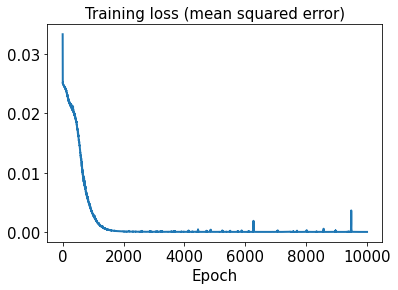

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

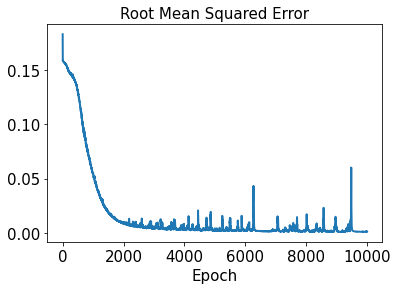

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

4.2544867e-05


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.002980497


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

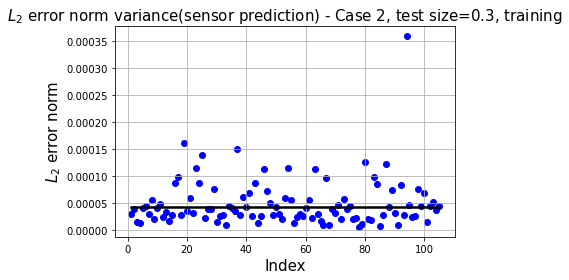

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

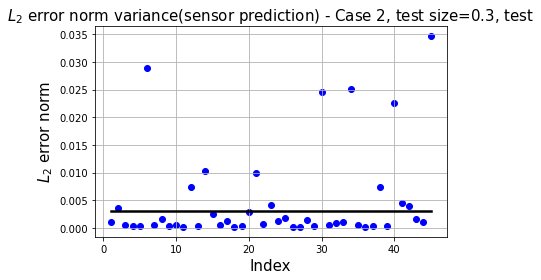

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0112 - rmse: 0.1053
Epoch 2/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.1051
Epoch 3/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0112 - rmse: 0.1049
Epoch 4/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1046
Epoch 5/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1044
Epoch 6/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 7/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.1037
Epoch 8/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.1033
Epoch 9/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0107 - rmse: 0.1028
Epoch 10/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1021
Epoch 11/10000
3/3 [=============================

3/3 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0581
Epoch 87/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0577
Epoch 88/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0574
Epoch 89/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 90/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0567
Epoch 91/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0563
Epoch 92/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 93/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0555
Epoch 94/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0552
Epoch 95/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 96/10000
3/3 [==============================] - 0

3/3 [==============================] - 0s 5ms/step - loss: 8.3668e-04 - rmse: 0.0260
Epoch 171/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2532e-04 - rmse: 0.0258
Epoch 172/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.1383e-04 - rmse: 0.0256
Epoch 173/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.0289e-04 - rmse: 0.0253
Epoch 174/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9388e-04 - rmse: 0.0252
Epoch 175/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.8301e-04 - rmse: 0.0250
Epoch 176/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.7236e-04 - rmse: 0.0247
Epoch 177/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6318e-04 - rmse: 0.0246
Epoch 178/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5361e-04 - rmse: 0.0244
Epoch 179/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4533e-04 - rmse: 0.0242
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 4.2992e-04 - rmse: 0.0164
Epoch 252/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2770e-04 - rmse: 0.0164
Epoch 253/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.2542e-04 - rmse: 0.0163
Epoch 254/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2232e-04 - rmse: 0.0162
Epoch 255/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.2138e-04 - rmse: 0.0162
Epoch 256/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1721e-04 - rmse: 0.0161
Epoch 257/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1458e-04 - rmse: 0.0160
Epoch 258/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1272e-04 - rmse: 0.0159
Epoch 259/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0999e-04 - rmse: 0.0158
Epoch 260/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0816e-04 - rmse: 0.0158
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 3.0447e-04 - rmse: 0.0122
Epoch 333/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0378e-04 - rmse: 0.0121
Epoch 334/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0304e-04 - rmse: 0.0121
Epoch 335/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0206e-04 - rmse: 0.0121
Epoch 336/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0118e-04 - rmse: 0.0120
Epoch 337/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0005e-04 - rmse: 0.0120
Epoch 338/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9923e-04 - rmse: 0.0119
Epoch 339/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.9840e-04 - rmse: 0.0119
Epoch 340/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9729e-04 - rmse: 0.0119
Epoch 341/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9676e-04 - rmse: 0.0118
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 2.4889e-04 - rmse: 0.0098
Epoch 414/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4839e-04 - rmse: 0.0097
Epoch 415/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4792e-04 - rmse: 0.0097
Epoch 416/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4708e-04 - rmse: 0.0097
Epoch 417/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4682e-04 - rmse: 0.0097
Epoch 418/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4601e-04 - rmse: 0.0096
Epoch 419/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4582e-04 - rmse: 0.0096
Epoch 420/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4513e-04 - rmse: 0.0096
Epoch 421/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4463e-04 - rmse: 0.0096
Epoch 422/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4434e-04 - rmse: 0.0095
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 2.1480e-04 - rmse: 0.0081
Epoch 495/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1427e-04 - rmse: 0.0080
Epoch 496/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1401e-04 - rmse: 0.0080
Epoch 497/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1375e-04 - rmse: 0.0080
Epoch 498/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1341e-04 - rmse: 0.0080
Epoch 499/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1335e-04 - rmse: 0.0080
Epoch 500/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1293e-04 - rmse: 0.0080
Epoch 501/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1257e-04 - rmse: 0.0079
Epoch 502/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1234e-04 - rmse: 0.0079
Epoch 503/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1194e-04 - rmse: 0.0079
Epoch 

3/3 [==============================] - 0s 6ms/step - loss: 1.9404e-04 - rmse: 0.0069
Epoch 576/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9364e-04 - rmse: 0.0069
Epoch 577/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9354e-04 - rmse: 0.0069
Epoch 578/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9344e-04 - rmse: 0.0069
Epoch 579/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9313e-04 - rmse: 0.0069
Epoch 580/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9302e-04 - rmse: 0.0069
Epoch 581/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9262e-04 - rmse: 0.0068
Epoch 582/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9251e-04 - rmse: 0.0068
Epoch 583/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9236e-04 - rmse: 0.0068
Epoch 584/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9224e-04 - rmse: 0.0068
Epoch 

3/3 [==============================] - 0s 6ms/step - loss: 1.7973e-04 - rmse: 0.0061
Epoch 657/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7973e-04 - rmse: 0.0061
Epoch 658/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7934e-04 - rmse: 0.0061
Epoch 659/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7931e-04 - rmse: 0.0061
Epoch 660/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7935e-04 - rmse: 0.0061
Epoch 661/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7903e-04 - rmse: 0.0061
Epoch 662/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7880e-04 - rmse: 0.0061
Epoch 663/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7886e-04 - rmse: 0.0061
Epoch 664/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7867e-04 - rmse: 0.0061
Epoch 665/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7840e-04 - rmse: 0.0061
Epoch 

3/3 [==============================] - 0s 6ms/step - loss: 1.6854e-04 - rmse: 0.0055
Epoch 738/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6855e-04 - rmse: 0.0055
Epoch 739/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6836e-04 - rmse: 0.0055
Epoch 740/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6815e-04 - rmse: 0.0055
Epoch 741/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6802e-04 - rmse: 0.0055
Epoch 742/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6805e-04 - rmse: 0.0055
Epoch 743/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6783e-04 - rmse: 0.0055
Epoch 744/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6757e-04 - rmse: 0.0055
Epoch 745/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6763e-04 - rmse: 0.0055
Epoch 746/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6750e-04 - rmse: 0.0055
Epoch 

3/3 [==============================] - 0s 6ms/step - loss: 1.5890e-04 - rmse: 0.0050
Epoch 819/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5887e-04 - rmse: 0.0050
Epoch 820/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5880e-04 - rmse: 0.0050
Epoch 821/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5868e-04 - rmse: 0.0050
Epoch 822/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5863e-04 - rmse: 0.0050
Epoch 823/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5856e-04 - rmse: 0.0050
Epoch 824/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5841e-04 - rmse: 0.0050
Epoch 825/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5832e-04 - rmse: 0.0050
Epoch 826/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5833e-04 - rmse: 0.0050
Epoch 827/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5839e-04 - rmse: 0.0050
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 1.5067e-04 - rmse: 0.0046
Epoch 900/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5066e-04 - rmse: 0.0046
Epoch 901/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5061e-04 - rmse: 0.0046
Epoch 902/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5082e-04 - rmse: 0.0046
Epoch 903/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5045e-04 - rmse: 0.0046
Epoch 904/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5040e-04 - rmse: 0.0046
Epoch 905/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5034e-04 - rmse: 0.0046
Epoch 906/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5024e-04 - rmse: 0.0046
Epoch 907/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4999e-04 - rmse: 0.0046
Epoch 908/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4991e-04 - rmse: 0.0046
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 1.4357e-04 - rmse: 0.0043
Epoch 981/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4347e-04 - rmse: 0.0042
Epoch 982/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4337e-04 - rmse: 0.0042
Epoch 983/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4321e-04 - rmse: 0.0042
Epoch 984/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4318e-04 - rmse: 0.0042
Epoch 985/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4314e-04 - rmse: 0.0042
Epoch 986/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4295e-04 - rmse: 0.0042
Epoch 987/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4288e-04 - rmse: 0.0042
Epoch 988/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4277e-04 - rmse: 0.0042
Epoch 989/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4271e-04 - rmse: 0.0042
Epoch 

3/3 [==============================] - 0s 5ms/step - loss: 1.3694e-04 - rmse: 0.0039
Epoch 1061/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3695e-04 - rmse: 0.0039
Epoch 1062/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3690e-04 - rmse: 0.0039
Epoch 1063/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3679e-04 - rmse: 0.0039
Epoch 1064/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3668e-04 - rmse: 0.0039
Epoch 1065/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3662e-04 - rmse: 0.0039
Epoch 1066/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3660e-04 - rmse: 0.0039
Epoch 1067/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3646e-04 - rmse: 0.0039
Epoch 1068/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3645e-04 - rmse: 0.0039
Epoch 1069/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3632e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.3114e-04 - rmse: 0.0037
Epoch 1141/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3126e-04 - rmse: 0.0037
Epoch 1142/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3116e-04 - rmse: 0.0037
Epoch 1143/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3098e-04 - rmse: 0.0037
Epoch 1144/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3084e-04 - rmse: 0.0037
Epoch 1145/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3086e-04 - rmse: 0.0037
Epoch 1146/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3061e-04 - rmse: 0.0037
Epoch 1147/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3062e-04 - rmse: 0.0037
Epoch 1148/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3050e-04 - rmse: 0.0037
Epoch 1149/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3035e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.2592e-04 - rmse: 0.0035
Epoch 1221/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2576e-04 - rmse: 0.0035
Epoch 1222/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2562e-04 - rmse: 0.0035
Epoch 1223/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2574e-04 - rmse: 0.0035
Epoch 1224/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2545e-04 - rmse: 0.0035
Epoch 1225/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2551e-04 - rmse: 0.0035
Epoch 1226/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2535e-04 - rmse: 0.0035
Epoch 1227/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2528e-04 - rmse: 0.0035
Epoch 1228/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.2515e-04 - rmse: 0.0035
Epoch 1229/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2505e-04 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.2054e-04 - rmse: 0.0033
Epoch 1301/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2043e-04 - rmse: 0.0033
Epoch 1302/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2035e-04 - rmse: 0.0033
Epoch 1303/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2030e-04 - rmse: 0.0033
Epoch 1304/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2028e-04 - rmse: 0.0033
Epoch 1305/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2007e-04 - rmse: 0.0033
Epoch 1306/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2007e-04 - rmse: 0.0033
Epoch 1307/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1995e-04 - rmse: 0.0033
Epoch 1308/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2001e-04 - rmse: 0.0033
Epoch 1309/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1983e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.1561e-04 - rmse: 0.0031
Epoch 1381/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1564e-04 - rmse: 0.0031
Epoch 1382/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1555e-04 - rmse: 0.0031
Epoch 1383/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1549e-04 - rmse: 0.0031
Epoch 1384/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1552e-04 - rmse: 0.0031
Epoch 1385/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1533e-04 - rmse: 0.0031
Epoch 1386/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1536e-04 - rmse: 0.0031
Epoch 1387/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1526e-04 - rmse: 0.0031
Epoch 1388/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1521e-04 - rmse: 0.0031
Epoch 1389/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1518e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.1113e-04 - rmse: 0.0030
Epoch 1461/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1105e-04 - rmse: 0.0030
Epoch 1462/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1119e-04 - rmse: 0.0030
Epoch 1463/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1112e-04 - rmse: 0.0030
Epoch 1464/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1106e-04 - rmse: 0.0030
Epoch 1465/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1103e-04 - rmse: 0.0030
Epoch 1466/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1091e-04 - rmse: 0.0030
Epoch 1467/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1078e-04 - rmse: 0.0030
Epoch 1468/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1072e-04 - rmse: 0.0030
Epoch 1469/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1086e-04 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.0689e-04 - rmse: 0.0028
Epoch 1541/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0671e-04 - rmse: 0.0028
Epoch 1542/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0681e-04 - rmse: 0.0028
Epoch 1543/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0674e-04 - rmse: 0.0028
Epoch 1544/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0653e-04 - rmse: 0.0028
Epoch 1545/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0658e-04 - rmse: 0.0028
Epoch 1546/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0648e-04 - rmse: 0.0028
Epoch 1547/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0640e-04 - rmse: 0.0028
Epoch 1548/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0641e-04 - rmse: 0.0028
Epoch 1549/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0637e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.0274e-04 - rmse: 0.0027
Epoch 1621/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0272e-04 - rmse: 0.0027
Epoch 1622/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0266e-04 - rmse: 0.0027
Epoch 1623/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0265e-04 - rmse: 0.0027
Epoch 1624/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0259e-04 - rmse: 0.0027
Epoch 1625/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0260e-04 - rmse: 0.0027
Epoch 1626/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0253e-04 - rmse: 0.0027
Epoch 1627/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0249e-04 - rmse: 0.0027
Epoch 1628/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0243e-04 - rmse: 0.0027
Epoch 1629/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0256e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.8980e-05 - rmse: 0.0026
Epoch 1701/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8933e-05 - rmse: 0.0026
Epoch 1702/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8814e-05 - rmse: 0.0026
Epoch 1703/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8752e-05 - rmse: 0.0026
Epoch 1704/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8756e-05 - rmse: 0.0026
Epoch 1705/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8673e-05 - rmse: 0.0026
Epoch 1706/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8572e-05 - rmse: 0.0026
Epoch 1707/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8608e-05 - rmse: 0.0026
Epoch 1708/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8488e-05 - rmse: 0.0026
Epoch 1709/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8492e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.5455e-05 - rmse: 0.0025
Epoch 1781/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.5383e-05 - rmse: 0.0025
Epoch 1782/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.5360e-05 - rmse: 0.0025
Epoch 1783/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5191e-05 - rmse: 0.0025
Epoch 1784/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5209e-05 - rmse: 0.0025
Epoch 1785/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5034e-05 - rmse: 0.0025
Epoch 1786/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4977e-05 - rmse: 0.0025
Epoch 1787/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4905e-05 - rmse: 0.0025
Epoch 1788/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4913e-05 - rmse: 0.0025
Epoch 1789/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4818e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.1952e-05 - rmse: 0.0024
Epoch 1861/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1834e-05 - rmse: 0.0024
Epoch 1862/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1711e-05 - rmse: 0.0024
Epoch 1863/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1741e-05 - rmse: 0.0024
Epoch 1864/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.1680e-05 - rmse: 0.0024
Epoch 1865/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1734e-05 - rmse: 0.0024
Epoch 1866/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1656e-05 - rmse: 0.0024
Epoch 1867/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1521e-05 - rmse: 0.0024
Epoch 1868/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1484e-05 - rmse: 0.0024
Epoch 1869/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1312e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 8.8592e-05 - rmse: 0.0024
Epoch 1941/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8450e-05 - rmse: 0.0023
Epoch 1942/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8426e-05 - rmse: 0.0023
Epoch 1943/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8349e-05 - rmse: 0.0023
Epoch 1944/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8259e-05 - rmse: 0.0023
Epoch 1945/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8262e-05 - rmse: 0.0023
Epoch 1946/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8205e-05 - rmse: 0.0023
Epoch 1947/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8187e-05 - rmse: 0.0023
Epoch 1948/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.8282e-05 - rmse: 0.0023
Epoch 1949/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8221e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 8.5490e-05 - rmse: 0.0023
Epoch 2021/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5393e-05 - rmse: 0.0023
Epoch 2022/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5378e-05 - rmse: 0.0023
Epoch 2023/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.5337e-05 - rmse: 0.0023
Epoch 2024/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.5318e-05 - rmse: 0.0023
Epoch 2025/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.5254e-05 - rmse: 0.0023
Epoch 2026/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.5174e-05 - rmse: 0.0023
Epoch 2027/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5109e-05 - rmse: 0.0022
Epoch 2028/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5155e-05 - rmse: 0.0023
Epoch 2029/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5009e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 8.2456e-05 - rmse: 0.0022
Epoch 2101/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.2363e-05 - rmse: 0.0022
Epoch 2102/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.2311e-05 - rmse: 0.0022
Epoch 2103/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2297e-05 - rmse: 0.0022
Epoch 2104/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2240e-05 - rmse: 0.0022
Epoch 2105/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2321e-05 - rmse: 0.0022
Epoch 2106/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2274e-05 - rmse: 0.0022
Epoch 2107/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2274e-05 - rmse: 0.0022
Epoch 2108/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2293e-05 - rmse: 0.0022
Epoch 2109/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2321e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.9619e-05 - rmse: 0.0021
Epoch 2181/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9581e-05 - rmse: 0.0021
Epoch 2182/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.9476e-05 - rmse: 0.0021
Epoch 2183/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9470e-05 - rmse: 0.0021
Epoch 2184/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9530e-05 - rmse: 0.0021
Epoch 2185/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9421e-05 - rmse: 0.0021
Epoch 2186/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9494e-05 - rmse: 0.0021
Epoch 2187/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.9467e-05 - rmse: 0.0021
Epoch 2188/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9429e-05 - rmse: 0.0021
Epoch 2189/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9397e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.6959e-05 - rmse: 0.0021
Epoch 2261/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6965e-05 - rmse: 0.0021
Epoch 2262/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6890e-05 - rmse: 0.0021
Epoch 2263/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6805e-05 - rmse: 0.0021
Epoch 2264/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6792e-05 - rmse: 0.0021
Epoch 2265/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6774e-05 - rmse: 0.0021
Epoch 2266/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.6762e-05 - rmse: 0.0021
Epoch 2267/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.6744e-05 - rmse: 0.0021
Epoch 2268/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6694e-05 - rmse: 0.0021
Epoch 2269/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.6647e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.4400e-05 - rmse: 0.0020
Epoch 2341/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4376e-05 - rmse: 0.0020
Epoch 2342/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.4382e-05 - rmse: 0.0020
Epoch 2343/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.4322e-05 - rmse: 0.0020
Epoch 2344/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4284e-05 - rmse: 0.0020
Epoch 2345/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.4244e-05 - rmse: 0.0020
Epoch 2346/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4229e-05 - rmse: 0.0020
Epoch 2347/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.4152e-05 - rmse: 0.0020
Epoch 2348/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4144e-05 - rmse: 0.0020
Epoch 2349/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4179e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 7.1983e-05 - rmse: 0.0020
Epoch 2421/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2009e-05 - rmse: 0.0020
Epoch 2422/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1929e-05 - rmse: 0.0020
Epoch 2423/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1949e-05 - rmse: 0.0020
Epoch 2424/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1922e-05 - rmse: 0.0020
Epoch 2425/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1854e-05 - rmse: 0.0020
Epoch 2426/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1796e-05 - rmse: 0.0019
Epoch 2427/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1810e-05 - rmse: 0.0020
Epoch 2428/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1766e-05 - rmse: 0.0020
Epoch 2429/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1744e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.9783e-05 - rmse: 0.0019
Epoch 2501/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9763e-05 - rmse: 0.0019
Epoch 2502/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9717e-05 - rmse: 0.0019
Epoch 2503/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9650e-05 - rmse: 0.0019
Epoch 2504/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9636e-05 - rmse: 0.0019
Epoch 2505/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9609e-05 - rmse: 0.0019
Epoch 2506/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9604e-05 - rmse: 0.0019
Epoch 2507/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9557e-05 - rmse: 0.0019
Epoch 2508/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9494e-05 - rmse: 0.0019
Epoch 2509/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9477e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.7637e-05 - rmse: 0.0019
Epoch 2581/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7617e-05 - rmse: 0.0019
Epoch 2582/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7506e-05 - rmse: 0.0019
Epoch 2583/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7465e-05 - rmse: 0.0019
Epoch 2584/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7422e-05 - rmse: 0.0019
Epoch 2585/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.7393e-05 - rmse: 0.0019
Epoch 2586/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.7376e-05 - rmse: 0.0019
Epoch 2587/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.7302e-05 - rmse: 0.0019
Epoch 2588/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.7319e-05 - rmse: 0.0019
Epoch 2589/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.7289e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.5535e-05 - rmse: 0.0019
Epoch 2661/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5576e-05 - rmse: 0.0019
Epoch 2662/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5499e-05 - rmse: 0.0019
Epoch 2663/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5535e-05 - rmse: 0.0019
Epoch 2664/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5540e-05 - rmse: 0.0019
Epoch 2665/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5478e-05 - rmse: 0.0019
Epoch 2666/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5402e-05 - rmse: 0.0019
Epoch 2667/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5346e-05 - rmse: 0.0019
Epoch 2668/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5311e-05 - rmse: 0.0019
Epoch 2669/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5267e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.3563e-05 - rmse: 0.0018
Epoch 2741/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3509e-05 - rmse: 0.0018
Epoch 2742/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3423e-05 - rmse: 0.0018
Epoch 2743/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3509e-05 - rmse: 0.0018
Epoch 2744/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3464e-05 - rmse: 0.0018
Epoch 2745/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3459e-05 - rmse: 0.0018
Epoch 2746/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3549e-05 - rmse: 0.0019
Epoch 2747/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3433e-05 - rmse: 0.0018
Epoch 2748/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3377e-05 - rmse: 0.0018
Epoch 2749/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3304e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 6.1607e-05 - rmse: 0.0018
Epoch 2821/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.1563e-05 - rmse: 0.0018
Epoch 2822/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.1514e-05 - rmse: 0.0018
Epoch 2823/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1536e-05 - rmse: 0.0018
Epoch 2824/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1535e-05 - rmse: 0.0018
Epoch 2825/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1547e-05 - rmse: 0.0018
Epoch 2826/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1486e-05 - rmse: 0.0018
Epoch 2827/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1437e-05 - rmse: 0.0018
Epoch 2828/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1422e-05 - rmse: 0.0018
Epoch 2829/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1350e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 5.9919e-05 - rmse: 0.0018
Epoch 2901/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9924e-05 - rmse: 0.0018
Epoch 2902/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9809e-05 - rmse: 0.0018
Epoch 2903/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9811e-05 - rmse: 0.0018
Epoch 2904/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9831e-05 - rmse: 0.0018
Epoch 2905/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9850e-05 - rmse: 0.0018
Epoch 2906/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9834e-05 - rmse: 0.0018
Epoch 2907/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9729e-05 - rmse: 0.0018
Epoch 2908/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9767e-05 - rmse: 0.0018
Epoch 2909/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9685e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.8090e-05 - rmse: 0.0017
Epoch 2981/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8038e-05 - rmse: 0.0017
Epoch 2982/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8061e-05 - rmse: 0.0017
Epoch 2983/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8023e-05 - rmse: 0.0017
Epoch 2984/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8008e-05 - rmse: 0.0017
Epoch 2985/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7977e-05 - rmse: 0.0017
Epoch 2986/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7915e-05 - rmse: 0.0017
Epoch 2987/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7917e-05 - rmse: 0.0017
Epoch 2988/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7883e-05 - rmse: 0.0017
Epoch 2989/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7880e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.6362e-05 - rmse: 0.0017
Epoch 3061/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6398e-05 - rmse: 0.0017
Epoch 3062/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6358e-05 - rmse: 0.0017
Epoch 3063/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6341e-05 - rmse: 0.0017
Epoch 3064/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6392e-05 - rmse: 0.0017
Epoch 3065/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6389e-05 - rmse: 0.0017
Epoch 3066/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6415e-05 - rmse: 0.0017
Epoch 3067/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6380e-05 - rmse: 0.0017
Epoch 3068/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6337e-05 - rmse: 0.0017
Epoch 3069/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6295e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 5.4959e-05 - rmse: 0.0017
Epoch 3141/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.5051e-05 - rmse: 0.0017
Epoch 3142/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.5020e-05 - rmse: 0.0017
Epoch 3143/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4960e-05 - rmse: 0.0017
Epoch 3144/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4922e-05 - rmse: 0.0017
Epoch 3145/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4968e-05 - rmse: 0.0017
Epoch 3146/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4936e-05 - rmse: 0.0017
Epoch 3147/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4829e-05 - rmse: 0.0017
Epoch 3148/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4834e-05 - rmse: 0.0017
Epoch 3149/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4821e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.3439e-05 - rmse: 0.0016
Epoch 3221/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3375e-05 - rmse: 0.0016
Epoch 3222/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3362e-05 - rmse: 0.0016
Epoch 3223/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3346e-05 - rmse: 0.0016
Epoch 3224/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3326e-05 - rmse: 0.0016
Epoch 3225/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3266e-05 - rmse: 0.0016
Epoch 3226/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3299e-05 - rmse: 0.0016
Epoch 3227/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3293e-05 - rmse: 0.0016
Epoch 3228/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3245e-05 - rmse: 0.0016
Epoch 3229/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3206e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 5.2024e-05 - rmse: 0.0016
Epoch 3301/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2066e-05 - rmse: 0.0016
Epoch 3302/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1975e-05 - rmse: 0.0016
Epoch 3303/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1942e-05 - rmse: 0.0016
Epoch 3304/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1897e-05 - rmse: 0.0016
Epoch 3305/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1889e-05 - rmse: 0.0016
Epoch 3306/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1834e-05 - rmse: 0.0016
Epoch 3307/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1808e-05 - rmse: 0.0016
Epoch 3308/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1835e-05 - rmse: 0.0016
Epoch 3309/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1853e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.0670e-05 - rmse: 0.0016
Epoch 3381/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0644e-05 - rmse: 0.0016
Epoch 3382/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0599e-05 - rmse: 0.0016
Epoch 3383/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0618e-05 - rmse: 0.0016
Epoch 3384/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0531e-05 - rmse: 0.0016
Epoch 3385/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0541e-05 - rmse: 0.0016
Epoch 3386/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0490e-05 - rmse: 0.0016
Epoch 3387/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0478e-05 - rmse: 0.0016
Epoch 3388/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0454e-05 - rmse: 0.0016
Epoch 3389/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0409e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.9311e-05 - rmse: 0.0016
Epoch 3461/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9297e-05 - rmse: 0.0016
Epoch 3462/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.9273e-05 - rmse: 0.0016
Epoch 3463/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.9252e-05 - rmse: 0.0016
Epoch 3464/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.9246e-05 - rmse: 0.0016
Epoch 3465/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9306e-05 - rmse: 0.0016
Epoch 3466/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9215e-05 - rmse: 0.0016
Epoch 3467/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9219e-05 - rmse: 0.0016
Epoch 3468/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9204e-05 - rmse: 0.0016
Epoch 3469/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9263e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.8093e-05 - rmse: 0.0016
Epoch 3541/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8160e-05 - rmse: 0.0016
Epoch 3542/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8131e-05 - rmse: 0.0016
Epoch 3543/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8052e-05 - rmse: 0.0016
Epoch 3544/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8070e-05 - rmse: 0.0016
Epoch 3545/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8018e-05 - rmse: 0.0016
Epoch 3546/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7952e-05 - rmse: 0.0015
Epoch 3547/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7954e-05 - rmse: 0.0015
Epoch 3548/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7989e-05 - rmse: 0.0016
Epoch 3549/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8060e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 4.7029e-05 - rmse: 0.0016
Epoch 3621/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6994e-05 - rmse: 0.0016
Epoch 3622/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6937e-05 - rmse: 0.0016
Epoch 3623/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6902e-05 - rmse: 0.0016
Epoch 3624/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6904e-05 - rmse: 0.0016
Epoch 3625/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6782e-05 - rmse: 0.0015
Epoch 3626/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6789e-05 - rmse: 0.0015
Epoch 3627/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6738e-05 - rmse: 0.0015
Epoch 3628/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6766e-05 - rmse: 0.0015
Epoch 3629/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.6726e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.5631e-05 - rmse: 0.0015
Epoch 3701/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5699e-05 - rmse: 0.0015
Epoch 3702/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5666e-05 - rmse: 0.0015
Epoch 3703/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5707e-05 - rmse: 0.0015
Epoch 3704/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5637e-05 - rmse: 0.0015
Epoch 3705/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5652e-05 - rmse: 0.0015
Epoch 3706/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5613e-05 - rmse: 0.0015
Epoch 3707/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5585e-05 - rmse: 0.0015
Epoch 3708/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5508e-05 - rmse: 0.0015
Epoch 3709/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5486e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.4491e-05 - rmse: 0.0015
Epoch 3781/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4479e-05 - rmse: 0.0015
Epoch 3782/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4448e-05 - rmse: 0.0015
Epoch 3783/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4479e-05 - rmse: 0.0015
Epoch 3784/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4474e-05 - rmse: 0.0015
Epoch 3785/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4453e-05 - rmse: 0.0015
Epoch 3786/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4428e-05 - rmse: 0.0015
Epoch 3787/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4453e-05 - rmse: 0.0015
Epoch 3788/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4443e-05 - rmse: 0.0015
Epoch 3789/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4383e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 4.3857e-05 - rmse: 0.0016
Epoch 3861/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4136e-05 - rmse: 0.0017
Epoch 3862/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4360e-05 - rmse: 0.0018
Epoch 3863/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4229e-05 - rmse: 0.0017
Epoch 3864/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4041e-05 - rmse: 0.0017
Epoch 3865/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4056e-05 - rmse: 0.0017
Epoch 3866/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4411e-05 - rmse: 0.0018
Epoch 3867/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4468e-05 - rmse: 0.0018
Epoch 3868/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4374e-05 - rmse: 0.0018
Epoch 3869/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4553e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.2567e-05 - rmse: 0.0015
Epoch 3941/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.2531e-05 - rmse: 0.0015
Epoch 3942/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2485e-05 - rmse: 0.0015
Epoch 3943/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.2490e-05 - rmse: 0.0015
Epoch 3944/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2419e-05 - rmse: 0.0014
Epoch 3945/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2386e-05 - rmse: 0.0014
Epoch 3946/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2360e-05 - rmse: 0.0014
Epoch 3947/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2325e-05 - rmse: 0.0014
Epoch 3948/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.2328e-05 - rmse: 0.0014
Epoch 3949/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.2289e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 4.1548e-05 - rmse: 0.0014
Epoch 4021/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.1533e-05 - rmse: 0.0014
Epoch 4022/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1525e-05 - rmse: 0.0014
Epoch 4023/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1487e-05 - rmse: 0.0014
Epoch 4024/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1454e-05 - rmse: 0.0014
Epoch 4025/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.1402e-05 - rmse: 0.0014
Epoch 4026/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1385e-05 - rmse: 0.0014
Epoch 4027/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1392e-05 - rmse: 0.0014
Epoch 4028/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1384e-05 - rmse: 0.0014
Epoch 4029/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.1340e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.0555e-05 - rmse: 0.0014
Epoch 4101/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0511e-05 - rmse: 0.0014
Epoch 4102/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0558e-05 - rmse: 0.0014
Epoch 4103/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0516e-05 - rmse: 0.0014
Epoch 4104/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.0514e-05 - rmse: 0.0014
Epoch 4105/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0521e-05 - rmse: 0.0014
Epoch 4106/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0539e-05 - rmse: 0.0014
Epoch 4107/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.0467e-05 - rmse: 0.0014
Epoch 4108/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.0477e-05 - rmse: 0.0014
Epoch 4109/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.0500e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.9744e-05 - rmse: 0.0014
Epoch 4181/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.9719e-05 - rmse: 0.0014
Epoch 4182/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.9670e-05 - rmse: 0.0014
Epoch 4183/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.9654e-05 - rmse: 0.0014
Epoch 4184/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.9615e-05 - rmse: 0.0014
Epoch 4185/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.9597e-05 - rmse: 0.0014
Epoch 4186/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9585e-05 - rmse: 0.0014
Epoch 4187/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9560e-05 - rmse: 0.0014
Epoch 4188/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.9575e-05 - rmse: 0.0014
Epoch 4189/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.9557e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 3.8802e-05 - rmse: 0.0014
Epoch 4261/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8842e-05 - rmse: 0.0014
Epoch 4262/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8824e-05 - rmse: 0.0014
Epoch 4263/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8796e-05 - rmse: 0.0014
Epoch 4264/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8828e-05 - rmse: 0.0014
Epoch 4265/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8776e-05 - rmse: 0.0014
Epoch 4266/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8761e-05 - rmse: 0.0014
Epoch 4267/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8775e-05 - rmse: 0.0014
Epoch 4268/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8760e-05 - rmse: 0.0014
Epoch 4269/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8740e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.8048e-05 - rmse: 0.0014
Epoch 4341/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8072e-05 - rmse: 0.0014
Epoch 4342/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8089e-05 - rmse: 0.0014
Epoch 4343/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8061e-05 - rmse: 0.0014
Epoch 4344/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8108e-05 - rmse: 0.0014
Epoch 4345/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8092e-05 - rmse: 0.0014
Epoch 4346/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8091e-05 - rmse: 0.0014
Epoch 4347/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.8008e-05 - rmse: 0.0014
Epoch 4348/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.7979e-05 - rmse: 0.0014
Epoch 4349/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.7901e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.7205e-05 - rmse: 0.0014
Epoch 4421/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.7226e-05 - rmse: 0.0014
Epoch 4422/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7207e-05 - rmse: 0.0014
Epoch 4423/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.7119e-05 - rmse: 0.0014
Epoch 4424/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7103e-05 - rmse: 0.0014
Epoch 4425/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7112e-05 - rmse: 0.0014
Epoch 4426/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7091e-05 - rmse: 0.0014
Epoch 4427/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7065e-05 - rmse: 0.0014
Epoch 4428/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7046e-05 - rmse: 0.0014
Epoch 4429/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7017e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.6461e-05 - rmse: 0.0014
Epoch 4501/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.6584e-05 - rmse: 0.0014
Epoch 4502/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6499e-05 - rmse: 0.0014
Epoch 4503/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6505e-05 - rmse: 0.0014
Epoch 4504/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6533e-05 - rmse: 0.0014
Epoch 4505/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.6495e-05 - rmse: 0.0014
Epoch 4506/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.6501e-05 - rmse: 0.0014
Epoch 4507/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.6476e-05 - rmse: 0.0014
Epoch 4508/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.6392e-05 - rmse: 0.0014
Epoch 4509/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.6396e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 3.5766e-05 - rmse: 0.0014
Epoch 4581/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.5736e-05 - rmse: 0.0014
Epoch 4582/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.5688e-05 - rmse: 0.0014
Epoch 4583/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.5627e-05 - rmse: 0.0013
Epoch 4584/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.5705e-05 - rmse: 0.0014
Epoch 4585/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.5730e-05 - rmse: 0.0014
Epoch 4586/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5670e-05 - rmse: 0.0014
Epoch 4587/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5679e-05 - rmse: 0.0014
Epoch 4588/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.5640e-05 - rmse: 0.0014
Epoch 4589/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.5641e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.4957e-05 - rmse: 0.0013
Epoch 4661/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4952e-05 - rmse: 0.0013
Epoch 4662/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4983e-05 - rmse: 0.0014
Epoch 4663/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4920e-05 - rmse: 0.0013
Epoch 4664/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4864e-05 - rmse: 0.0013
Epoch 4665/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4865e-05 - rmse: 0.0013
Epoch 4666/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4857e-05 - rmse: 0.0013
Epoch 4667/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4832e-05 - rmse: 0.0013
Epoch 4668/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4845e-05 - rmse: 0.0013
Epoch 4669/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4853e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.4283e-05 - rmse: 0.0013
Epoch 4741/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4249e-05 - rmse: 0.0013
Epoch 4742/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4228e-05 - rmse: 0.0013
Epoch 4743/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4203e-05 - rmse: 0.0013
Epoch 4744/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4183e-05 - rmse: 0.0013
Epoch 4745/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4164e-05 - rmse: 0.0013
Epoch 4746/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.4130e-05 - rmse: 0.0013
Epoch 4747/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4099e-05 - rmse: 0.0013
Epoch 4748/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4105e-05 - rmse: 0.0013
Epoch 4749/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.4098e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.3674e-05 - rmse: 0.0014
Epoch 4821/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3754e-05 - rmse: 0.0014
Epoch 4822/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3709e-05 - rmse: 0.0014
Epoch 4823/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3708e-05 - rmse: 0.0014
Epoch 4824/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3675e-05 - rmse: 0.0014
Epoch 4825/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3680e-05 - rmse: 0.0014
Epoch 4826/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3767e-05 - rmse: 0.0014
Epoch 4827/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3714e-05 - rmse: 0.0014
Epoch 4828/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3678e-05 - rmse: 0.0014
Epoch 4829/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3664e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.3067e-05 - rmse: 0.0014
Epoch 4901/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3103e-05 - rmse: 0.0014
Epoch 4902/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.3053e-05 - rmse: 0.0014
Epoch 4903/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2996e-05 - rmse: 0.0013
Epoch 4904/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.3001e-05 - rmse: 0.0013
Epoch 4905/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2954e-05 - rmse: 0.0013
Epoch 4906/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2919e-05 - rmse: 0.0013
Epoch 4907/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2935e-05 - rmse: 0.0013
Epoch 4908/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.2970e-05 - rmse: 0.0013
Epoch 4909/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2998e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.2541e-05 - rmse: 0.0014
Epoch 4981/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2431e-05 - rmse: 0.0013
Epoch 4982/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2454e-05 - rmse: 0.0013
Epoch 4983/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2360e-05 - rmse: 0.0013
Epoch 4984/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2312e-05 - rmse: 0.0013
Epoch 4985/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2274e-05 - rmse: 0.0013
Epoch 4986/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2262e-05 - rmse: 0.0013
Epoch 4987/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2230e-05 - rmse: 0.0013
Epoch 4988/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.2231e-05 - rmse: 0.0013
Epoch 4989/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.2222e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 3.1726e-05 - rmse: 0.0013
Epoch 5061/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1684e-05 - rmse: 0.0013
Epoch 5062/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1684e-05 - rmse: 0.0013
Epoch 5063/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1693e-05 - rmse: 0.0013
Epoch 5064/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1701e-05 - rmse: 0.0013
Epoch 5065/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1720e-05 - rmse: 0.0013
Epoch 5066/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1676e-05 - rmse: 0.0013
Epoch 5067/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1699e-05 - rmse: 0.0013
Epoch 5068/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1707e-05 - rmse: 0.0013
Epoch 5069/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1713e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 3.1235e-05 - rmse: 0.0013
Epoch 5141/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1234e-05 - rmse: 0.0013
Epoch 5142/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1134e-05 - rmse: 0.0013
Epoch 5143/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1130e-05 - rmse: 0.0013
Epoch 5144/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1148e-05 - rmse: 0.0013
Epoch 5145/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1134e-05 - rmse: 0.0013
Epoch 5146/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1144e-05 - rmse: 0.0013
Epoch 5147/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.1166e-05 - rmse: 0.0013
Epoch 5148/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1170e-05 - rmse: 0.0013
Epoch 5149/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1156e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.0881e-05 - rmse: 0.0014
Epoch 5221/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0801e-05 - rmse: 0.0013
Epoch 5222/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0770e-05 - rmse: 0.0013
Epoch 5223/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0716e-05 - rmse: 0.0013
Epoch 5224/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0675e-05 - rmse: 0.0013
Epoch 5225/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0675e-05 - rmse: 0.0013
Epoch 5226/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0666e-05 - rmse: 0.0013
Epoch 5227/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0681e-05 - rmse: 0.0013
Epoch 5228/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0684e-05 - rmse: 0.0013
Epoch 5229/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0637e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 3.0170e-05 - rmse: 0.0013
Epoch 5301/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0165e-05 - rmse: 0.0013
Epoch 5302/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0172e-05 - rmse: 0.0013
Epoch 5303/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0123e-05 - rmse: 0.0013
Epoch 5304/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.0133e-05 - rmse: 0.0013
Epoch 5305/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0156e-05 - rmse: 0.0013
Epoch 5306/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0126e-05 - rmse: 0.0013
Epoch 5307/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0070e-05 - rmse: 0.0013
Epoch 5308/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0088e-05 - rmse: 0.0013
Epoch 5309/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.0047e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.9593e-05 - rmse: 0.0012
Epoch 5381/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9584e-05 - rmse: 0.0012
Epoch 5382/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9597e-05 - rmse: 0.0012
Epoch 5383/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9613e-05 - rmse: 0.0013
Epoch 5384/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9630e-05 - rmse: 0.0013
Epoch 5385/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9631e-05 - rmse: 0.0013
Epoch 5386/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9573e-05 - rmse: 0.0012
Epoch 5387/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9551e-05 - rmse: 0.0012
Epoch 5388/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9550e-05 - rmse: 0.0012
Epoch 5389/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9560e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 2.9222e-05 - rmse: 0.0013
Epoch 5461/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9222e-05 - rmse: 0.0013
Epoch 5462/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.9177e-05 - rmse: 0.0013
Epoch 5463/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9175e-05 - rmse: 0.0013
Epoch 5464/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9172e-05 - rmse: 0.0013
Epoch 5465/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9166e-05 - rmse: 0.0013
Epoch 5466/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9145e-05 - rmse: 0.0013
Epoch 5467/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9105e-05 - rmse: 0.0012
Epoch 5468/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.9106e-05 - rmse: 0.0012
Epoch 5469/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.9075e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.8676e-05 - rmse: 0.0012
Epoch 5541/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8690e-05 - rmse: 0.0012
Epoch 5542/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8659e-05 - rmse: 0.0012
Epoch 5543/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8671e-05 - rmse: 0.0012
Epoch 5544/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8642e-05 - rmse: 0.0012
Epoch 5545/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8617e-05 - rmse: 0.0012
Epoch 5546/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8660e-05 - rmse: 0.0012
Epoch 5547/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8609e-05 - rmse: 0.0012
Epoch 5548/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8620e-05 - rmse: 0.0012
Epoch 5549/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.8611e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.8316e-05 - rmse: 0.0013
Epoch 5621/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8449e-05 - rmse: 0.0013
Epoch 5622/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8369e-05 - rmse: 0.0013
Epoch 5623/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8430e-05 - rmse: 0.0013
Epoch 5624/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8496e-05 - rmse: 0.0013
Epoch 5625/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8473e-05 - rmse: 0.0013
Epoch 5626/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8505e-05 - rmse: 0.0013
Epoch 5627/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.8450e-05 - rmse: 0.0013
Epoch 5628/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.8400e-05 - rmse: 0.0013
Epoch 5629/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.8394e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.7767e-05 - rmse: 0.0012
Epoch 5701/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7767e-05 - rmse: 0.0012
Epoch 5702/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7774e-05 - rmse: 0.0012
Epoch 5703/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7777e-05 - rmse: 0.0012
Epoch 5704/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7751e-05 - rmse: 0.0012
Epoch 5705/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7824e-05 - rmse: 0.0012
Epoch 5706/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.7814e-05 - rmse: 0.0012
Epoch 5707/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7823e-05 - rmse: 0.0012
Epoch 5708/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7781e-05 - rmse: 0.0012
Epoch 5709/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7774e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.7520e-05 - rmse: 0.0013
Epoch 5781/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7510e-05 - rmse: 0.0013
Epoch 5782/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7505e-05 - rmse: 0.0013
Epoch 5783/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7470e-05 - rmse: 0.0013
Epoch 5784/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7461e-05 - rmse: 0.0012
Epoch 5785/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7432e-05 - rmse: 0.0012
Epoch 5786/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7460e-05 - rmse: 0.0013
Epoch 5787/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7482e-05 - rmse: 0.0013
Epoch 5788/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7516e-05 - rmse: 0.0013
Epoch 5789/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7575e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.7096e-05 - rmse: 0.0013
Epoch 5861/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7079e-05 - rmse: 0.0012
Epoch 5862/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7115e-05 - rmse: 0.0013
Epoch 5863/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7143e-05 - rmse: 0.0013
Epoch 5864/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7074e-05 - rmse: 0.0012
Epoch 5865/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7105e-05 - rmse: 0.0013
Epoch 5866/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.7123e-05 - rmse: 0.0013
Epoch 5867/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7135e-05 - rmse: 0.0013
Epoch 5868/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.7046e-05 - rmse: 0.0012
Epoch 5869/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6991e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.6847e-05 - rmse: 0.0013
Epoch 5941/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6888e-05 - rmse: 0.0013
Epoch 5942/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6875e-05 - rmse: 0.0013
Epoch 5943/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6791e-05 - rmse: 0.0013
Epoch 5944/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6838e-05 - rmse: 0.0013
Epoch 5945/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6670e-05 - rmse: 0.0012
Epoch 5946/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6627e-05 - rmse: 0.0012
Epoch 5947/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6611e-05 - rmse: 0.0012
Epoch 5948/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6608e-05 - rmse: 0.0012
Epoch 5949/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6598e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.6199e-05 - rmse: 0.0012
Epoch 6021/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6176e-05 - rmse: 0.0012
Epoch 6022/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.6194e-05 - rmse: 0.0012
Epoch 6023/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6211e-05 - rmse: 0.0012
Epoch 6024/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6200e-05 - rmse: 0.0012
Epoch 6025/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6232e-05 - rmse: 0.0012
Epoch 6026/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6224e-05 - rmse: 0.0012
Epoch 6027/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6194e-05 - rmse: 0.0012
Epoch 6028/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6182e-05 - rmse: 0.0012
Epoch 6029/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6175e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.5937e-05 - rmse: 0.0012
Epoch 6101/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5927e-05 - rmse: 0.0012
Epoch 6102/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5865e-05 - rmse: 0.0012
Epoch 6103/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5859e-05 - rmse: 0.0012
Epoch 6104/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5823e-05 - rmse: 0.0012
Epoch 6105/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5818e-05 - rmse: 0.0012
Epoch 6106/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5799e-05 - rmse: 0.0012
Epoch 6107/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5817e-05 - rmse: 0.0012
Epoch 6108/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5806e-05 - rmse: 0.0012
Epoch 6109/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5834e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 2.5545e-05 - rmse: 0.0012
Epoch 6181/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5495e-05 - rmse: 0.0012
Epoch 6182/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5466e-05 - rmse: 0.0012
Epoch 6183/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5456e-05 - rmse: 0.0012
Epoch 6184/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5449e-05 - rmse: 0.0012
Epoch 6185/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5456e-05 - rmse: 0.0012
Epoch 6186/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5471e-05 - rmse: 0.0012
Epoch 6187/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5472e-05 - rmse: 0.0012
Epoch 6188/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5458e-05 - rmse: 0.0012
Epoch 6189/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5475e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.5205e-05 - rmse: 0.0012
Epoch 6261/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5310e-05 - rmse: 0.0012
Epoch 6262/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5241e-05 - rmse: 0.0012
Epoch 6263/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5202e-05 - rmse: 0.0012
Epoch 6264/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.5185e-05 - rmse: 0.0012
Epoch 6265/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5179e-05 - rmse: 0.0012
Epoch 6266/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5148e-05 - rmse: 0.0012
Epoch 6267/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5123e-05 - rmse: 0.0012
Epoch 6268/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5128e-05 - rmse: 0.0012
Epoch 6269/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.5135e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.4900e-05 - rmse: 0.0012
Epoch 6341/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4892e-05 - rmse: 0.0012
Epoch 6342/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4878e-05 - rmse: 0.0012
Epoch 6343/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4798e-05 - rmse: 0.0012
Epoch 6344/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4818e-05 - rmse: 0.0012
Epoch 6345/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4841e-05 - rmse: 0.0012
Epoch 6346/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4830e-05 - rmse: 0.0012
Epoch 6347/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4805e-05 - rmse: 0.0012
Epoch 6348/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4901e-05 - rmse: 0.0012
Epoch 6349/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4886e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.4542e-05 - rmse: 0.0012
Epoch 6421/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4504e-05 - rmse: 0.0012
Epoch 6422/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4570e-05 - rmse: 0.0012
Epoch 6423/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4607e-05 - rmse: 0.0012
Epoch 6424/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4571e-05 - rmse: 0.0012
Epoch 6425/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4581e-05 - rmse: 0.0012
Epoch 6426/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4589e-05 - rmse: 0.0012
Epoch 6427/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4460e-05 - rmse: 0.0012
Epoch 6428/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4474e-05 - rmse: 0.0012
Epoch 6429/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4586e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.4265e-05 - rmse: 0.0012
Epoch 6501/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4279e-05 - rmse: 0.0012
Epoch 6502/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4356e-05 - rmse: 0.0012
Epoch 6503/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4279e-05 - rmse: 0.0012
Epoch 6504/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4221e-05 - rmse: 0.0012
Epoch 6505/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4249e-05 - rmse: 0.0012
Epoch 6506/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4240e-05 - rmse: 0.0012
Epoch 6507/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.4256e-05 - rmse: 0.0012
Epoch 6508/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4179e-05 - rmse: 0.0012
Epoch 6509/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.4212e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.3896e-05 - rmse: 0.0012
Epoch 6581/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3918e-05 - rmse: 0.0012
Epoch 6582/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3865e-05 - rmse: 0.0012
Epoch 6583/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3920e-05 - rmse: 0.0012
Epoch 6584/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3893e-05 - rmse: 0.0012
Epoch 6585/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3832e-05 - rmse: 0.0011
Epoch 6586/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3811e-05 - rmse: 0.0011
Epoch 6587/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3833e-05 - rmse: 0.0012
Epoch 6588/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3844e-05 - rmse: 0.0012
Epoch 6589/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3797e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.4146e-05 - rmse: 0.0014
Epoch 6661/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3921e-05 - rmse: 0.0013
Epoch 6662/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3844e-05 - rmse: 0.0013
Epoch 6663/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3780e-05 - rmse: 0.0012
Epoch 6664/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3664e-05 - rmse: 0.0012
Epoch 6665/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3630e-05 - rmse: 0.0012
Epoch 6666/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3714e-05 - rmse: 0.0012
Epoch 6667/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3687e-05 - rmse: 0.0012
Epoch 6668/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3685e-05 - rmse: 0.0012
Epoch 6669/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3651e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.3278e-05 - rmse: 0.0011
Epoch 6741/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3289e-05 - rmse: 0.0011
Epoch 6742/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3264e-05 - rmse: 0.0011
Epoch 6743/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3312e-05 - rmse: 0.0012
Epoch 6744/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3307e-05 - rmse: 0.0012
Epoch 6745/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3287e-05 - rmse: 0.0011
Epoch 6746/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3338e-05 - rmse: 0.0012
Epoch 6747/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3376e-05 - rmse: 0.0012
Epoch 6748/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3372e-05 - rmse: 0.0012
Epoch 6749/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3369e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.3012e-05 - rmse: 0.0011
Epoch 6821/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3032e-05 - rmse: 0.0011
Epoch 6822/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3002e-05 - rmse: 0.0011
Epoch 6823/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.3026e-05 - rmse: 0.0011
Epoch 6824/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3014e-05 - rmse: 0.0011
Epoch 6825/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3017e-05 - rmse: 0.0011
Epoch 6826/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3005e-05 - rmse: 0.0011
Epoch 6827/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2997e-05 - rmse: 0.0011
Epoch 6828/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3006e-05 - rmse: 0.0011
Epoch 6829/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3040e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.2758e-05 - rmse: 0.0011
Epoch 6901/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2737e-05 - rmse: 0.0011
Epoch 6902/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2722e-05 - rmse: 0.0011
Epoch 6903/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2769e-05 - rmse: 0.0011
Epoch 6904/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2748e-05 - rmse: 0.0011
Epoch 6905/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2725e-05 - rmse: 0.0011
Epoch 6906/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2763e-05 - rmse: 0.0011
Epoch 6907/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2776e-05 - rmse: 0.0012
Epoch 6908/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2793e-05 - rmse: 0.0012
Epoch 6909/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2772e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.2662e-05 - rmse: 0.0012
Epoch 6981/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2725e-05 - rmse: 0.0012
Epoch 6982/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2705e-05 - rmse: 0.0012
Epoch 6983/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2713e-05 - rmse: 0.0012
Epoch 6984/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2775e-05 - rmse: 0.0013
Epoch 6985/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2726e-05 - rmse: 0.0012
Epoch 6986/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2671e-05 - rmse: 0.0012
Epoch 6987/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2754e-05 - rmse: 0.0012
Epoch 6988/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2753e-05 - rmse: 0.0012
Epoch 6989/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2742e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.2254e-05 - rmse: 0.0011
Epoch 7061/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2272e-05 - rmse: 0.0011
Epoch 7062/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2324e-05 - rmse: 0.0012
Epoch 7063/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2299e-05 - rmse: 0.0012
Epoch 7064/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2292e-05 - rmse: 0.0011
Epoch 7065/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2269e-05 - rmse: 0.0011
Epoch 7066/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2259e-05 - rmse: 0.0011
Epoch 7067/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2270e-05 - rmse: 0.0011
Epoch 7068/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2240e-05 - rmse: 0.0011
Epoch 7069/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2229e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.2090e-05 - rmse: 0.0012
Epoch 7141/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2079e-05 - rmse: 0.0012
Epoch 7142/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2126e-05 - rmse: 0.0012
Epoch 7143/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2129e-05 - rmse: 0.0012
Epoch 7144/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2161e-05 - rmse: 0.0012
Epoch 7145/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2084e-05 - rmse: 0.0012
Epoch 7146/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2050e-05 - rmse: 0.0011
Epoch 7147/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.2048e-05 - rmse: 0.0011
Epoch 7148/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2031e-05 - rmse: 0.0011
Epoch 7149/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2026e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.1755e-05 - rmse: 0.0011
Epoch 7221/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1764e-05 - rmse: 0.0011
Epoch 7222/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1734e-05 - rmse: 0.0011
Epoch 7223/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1737e-05 - rmse: 0.0011
Epoch 7224/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1718e-05 - rmse: 0.0011
Epoch 7225/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1705e-05 - rmse: 0.0011
Epoch 7226/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1702e-05 - rmse: 0.0011
Epoch 7227/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1706e-05 - rmse: 0.0011
Epoch 7228/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1687e-05 - rmse: 0.0011
Epoch 7229/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1714e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.1613e-05 - rmse: 0.0011
Epoch 7301/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1682e-05 - rmse: 0.0012
Epoch 7302/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1865e-05 - rmse: 0.0013
Epoch 7303/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1847e-05 - rmse: 0.0012
Epoch 7304/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1672e-05 - rmse: 0.0012
Epoch 7305/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1624e-05 - rmse: 0.0012
Epoch 7306/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1635e-05 - rmse: 0.0012
Epoch 7307/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1590e-05 - rmse: 0.0011
Epoch 7308/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1645e-05 - rmse: 0.0012
Epoch 7309/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1613e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.1379e-05 - rmse: 0.0011
Epoch 7381/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1352e-05 - rmse: 0.0011
Epoch 7382/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1375e-05 - rmse: 0.0011
Epoch 7383/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1446e-05 - rmse: 0.0012
Epoch 7384/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1434e-05 - rmse: 0.0012
Epoch 7385/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1417e-05 - rmse: 0.0012
Epoch 7386/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1367e-05 - rmse: 0.0011
Epoch 7387/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1354e-05 - rmse: 0.0011
Epoch 7388/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1354e-05 - rmse: 0.0011
Epoch 7389/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1314e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.1412e-05 - rmse: 0.0012
Epoch 7461/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1443e-05 - rmse: 0.0012
Epoch 7462/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1382e-05 - rmse: 0.0012
Epoch 7463/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1338e-05 - rmse: 0.0012
Epoch 7464/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1335e-05 - rmse: 0.0012
Epoch 7465/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1221e-05 - rmse: 0.0012
Epoch 7466/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.1191e-05 - rmse: 0.0012
Epoch 7467/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1153e-05 - rmse: 0.0011
Epoch 7468/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1184e-05 - rmse: 0.0012
Epoch 7469/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.1109e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.1007e-05 - rmse: 0.0012
Epoch 7541/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0980e-05 - rmse: 0.0011
Epoch 7542/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0973e-05 - rmse: 0.0011
Epoch 7543/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0915e-05 - rmse: 0.0011
Epoch 7544/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0941e-05 - rmse: 0.0011
Epoch 7545/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0888e-05 - rmse: 0.0011
Epoch 7546/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0878e-05 - rmse: 0.0011
Epoch 7547/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0887e-05 - rmse: 0.0011
Epoch 7548/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0898e-05 - rmse: 0.0011
Epoch 7549/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0948e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.0763e-05 - rmse: 0.0011
Epoch 7621/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0777e-05 - rmse: 0.0011
Epoch 7622/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0738e-05 - rmse: 0.0011
Epoch 7623/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0692e-05 - rmse: 0.0011
Epoch 7624/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0714e-05 - rmse: 0.0011
Epoch 7625/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0716e-05 - rmse: 0.0011
Epoch 7626/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0682e-05 - rmse: 0.0011
Epoch 7627/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0703e-05 - rmse: 0.0011
Epoch 7628/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0699e-05 - rmse: 0.0011
Epoch 7629/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0747e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 2.0603e-05 - rmse: 0.0011
Epoch 7701/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0598e-05 - rmse: 0.0011
Epoch 7702/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0635e-05 - rmse: 0.0012
Epoch 7703/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0565e-05 - rmse: 0.0011
Epoch 7704/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0604e-05 - rmse: 0.0011
Epoch 7705/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0513e-05 - rmse: 0.0011
Epoch 7706/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0522e-05 - rmse: 0.0011
Epoch 7707/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0487e-05 - rmse: 0.0011
Epoch 7708/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0527e-05 - rmse: 0.0011
Epoch 7709/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0478e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.0301e-05 - rmse: 0.0011
Epoch 7781/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0302e-05 - rmse: 0.0011
Epoch 7782/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0271e-05 - rmse: 0.0011
Epoch 7783/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0248e-05 - rmse: 0.0011
Epoch 7784/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0240e-05 - rmse: 0.0011
Epoch 7785/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0210e-05 - rmse: 0.0011
Epoch 7786/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0217e-05 - rmse: 0.0011
Epoch 7787/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0231e-05 - rmse: 0.0011
Epoch 7788/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0223e-05 - rmse: 0.0011
Epoch 7789/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0228e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.0083e-05 - rmse: 0.0011
Epoch 7861/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0081e-05 - rmse: 0.0011
Epoch 7862/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0075e-05 - rmse: 0.0011
Epoch 7863/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0099e-05 - rmse: 0.0011
Epoch 7864/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0095e-05 - rmse: 0.0011
Epoch 7865/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0063e-05 - rmse: 0.0011
Epoch 7866/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0056e-05 - rmse: 0.0011
Epoch 7867/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0055e-05 - rmse: 0.0011
Epoch 7868/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0056e-05 - rmse: 0.0011
Epoch 7869/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0045e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 2.0123e-05 - rmse: 0.0012
Epoch 7941/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0178e-05 - rmse: 0.0012
Epoch 7942/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0240e-05 - rmse: 0.0012
Epoch 7943/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0202e-05 - rmse: 0.0012
Epoch 7944/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0205e-05 - rmse: 0.0012
Epoch 7945/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0166e-05 - rmse: 0.0012
Epoch 7946/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0176e-05 - rmse: 0.0012
Epoch 7947/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0229e-05 - rmse: 0.0012
Epoch 7948/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0258e-05 - rmse: 0.0012
Epoch 7949/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0304e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.9794e-05 - rmse: 0.0011
Epoch 8021/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9756e-05 - rmse: 0.0011
Epoch 8022/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9752e-05 - rmse: 0.0011
Epoch 8023/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9744e-05 - rmse: 0.0011
Epoch 8024/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9757e-05 - rmse: 0.0011
Epoch 8025/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9731e-05 - rmse: 0.0011
Epoch 8026/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9722e-05 - rmse: 0.0011
Epoch 8027/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9729e-05 - rmse: 0.0011
Epoch 8028/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9732e-05 - rmse: 0.0011
Epoch 8029/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9751e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.9582e-05 - rmse: 0.0011
Epoch 8101/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9565e-05 - rmse: 0.0011
Epoch 8102/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9598e-05 - rmse: 0.0011
Epoch 8103/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9579e-05 - rmse: 0.0011
Epoch 8104/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9642e-05 - rmse: 0.0011
Epoch 8105/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9614e-05 - rmse: 0.0011
Epoch 8106/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9651e-05 - rmse: 0.0011
Epoch 8107/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9655e-05 - rmse: 0.0011
Epoch 8108/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9653e-05 - rmse: 0.0011
Epoch 8109/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9619e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.9469e-05 - rmse: 0.0011
Epoch 8181/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9443e-05 - rmse: 0.0011
Epoch 8182/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9444e-05 - rmse: 0.0011
Epoch 8183/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9397e-05 - rmse: 0.0011
Epoch 8184/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9397e-05 - rmse: 0.0011
Epoch 8185/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9403e-05 - rmse: 0.0011
Epoch 8186/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9384e-05 - rmse: 0.0011
Epoch 8187/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9383e-05 - rmse: 0.0011
Epoch 8188/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9399e-05 - rmse: 0.0011
Epoch 8189/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9394e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.9297e-05 - rmse: 0.0011
Epoch 8261/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9289e-05 - rmse: 0.0011
Epoch 8262/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9347e-05 - rmse: 0.0011
Epoch 8263/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9368e-05 - rmse: 0.0011
Epoch 8264/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9489e-05 - rmse: 0.0012
Epoch 8265/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9324e-05 - rmse: 0.0011
Epoch 8266/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9337e-05 - rmse: 0.0011
Epoch 8267/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9349e-05 - rmse: 0.0011
Epoch 8268/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9371e-05 - rmse: 0.0011
Epoch 8269/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9411e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.9137e-05 - rmse: 0.0011
Epoch 8341/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9121e-05 - rmse: 0.0011
Epoch 8342/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9121e-05 - rmse: 0.0011
Epoch 8343/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9098e-05 - rmse: 0.0011
Epoch 8344/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9088e-05 - rmse: 0.0011
Epoch 8345/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9147e-05 - rmse: 0.0011
Epoch 8346/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9145e-05 - rmse: 0.0011
Epoch 8347/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9138e-05 - rmse: 0.0011
Epoch 8348/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9123e-05 - rmse: 0.0011
Epoch 8349/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9075e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.8987e-05 - rmse: 0.0011
Epoch 8421/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8944e-05 - rmse: 0.0011
Epoch 8422/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8952e-05 - rmse: 0.0011
Epoch 8423/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8964e-05 - rmse: 0.0011
Epoch 8424/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8947e-05 - rmse: 0.0011
Epoch 8425/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9022e-05 - rmse: 0.0011
Epoch 8426/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8983e-05 - rmse: 0.0011
Epoch 8427/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.9006e-05 - rmse: 0.0011
Epoch 8428/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8991e-05 - rmse: 0.0011
Epoch 8429/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8970e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.8770e-05 - rmse: 0.0010
Epoch 8501/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8759e-05 - rmse: 0.0010
Epoch 8502/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8767e-05 - rmse: 0.0010
Epoch 8503/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8724e-05 - rmse: 0.0010
Epoch 8504/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8727e-05 - rmse: 0.0010
Epoch 8505/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8717e-05 - rmse: 0.0010
Epoch 8506/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8717e-05 - rmse: 0.0010
Epoch 8507/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8774e-05 - rmse: 0.0010
Epoch 8508/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8722e-05 - rmse: 0.0010
Epoch 8509/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8719e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.8755e-05 - rmse: 0.0011
Epoch 8581/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8749e-05 - rmse: 0.0011
Epoch 8582/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8755e-05 - rmse: 0.0011
Epoch 8583/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8750e-05 - rmse: 0.0011
Epoch 8584/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8848e-05 - rmse: 0.0011
Epoch 8585/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8778e-05 - rmse: 0.0011
Epoch 8586/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8787e-05 - rmse: 0.0011
Epoch 8587/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8723e-05 - rmse: 0.0011
Epoch 8588/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8697e-05 - rmse: 0.0011
Epoch 8589/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8723e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.8604e-05 - rmse: 0.0011
Epoch 8661/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8645e-05 - rmse: 0.0011
Epoch 8662/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8628e-05 - rmse: 0.0011
Epoch 8663/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8682e-05 - rmse: 0.0011
Epoch 8664/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8740e-05 - rmse: 0.0012
Epoch 8665/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8791e-05 - rmse: 0.0012
Epoch 8666/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8818e-05 - rmse: 0.0012
Epoch 8667/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8831e-05 - rmse: 0.0012
Epoch 8668/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8872e-05 - rmse: 0.0012
Epoch 8669/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8742e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.8388e-05 - rmse: 0.0011
Epoch 8741/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8377e-05 - rmse: 0.0010
Epoch 8742/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8341e-05 - rmse: 0.0010
Epoch 8743/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8358e-05 - rmse: 0.0010
Epoch 8744/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8342e-05 - rmse: 0.0010
Epoch 8745/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8375e-05 - rmse: 0.0011
Epoch 8746/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8379e-05 - rmse: 0.0011
Epoch 8747/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8377e-05 - rmse: 0.0011
Epoch 8748/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8349e-05 - rmse: 0.0010
Epoch 8749/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8397e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.8286e-05 - rmse: 0.0011
Epoch 8821/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8348e-05 - rmse: 0.0011
Epoch 8822/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8302e-05 - rmse: 0.0011
Epoch 8823/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8376e-05 - rmse: 0.0011
Epoch 8824/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8320e-05 - rmse: 0.0011
Epoch 8825/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8394e-05 - rmse: 0.0011
Epoch 8826/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8408e-05 - rmse: 0.0011
Epoch 8827/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8483e-05 - rmse: 0.0012
Epoch 8828/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8651e-05 - rmse: 0.0012
Epoch 8829/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8600e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.8126e-05 - rmse: 0.0010
Epoch 8901/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8144e-05 - rmse: 0.0011
Epoch 8902/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8114e-05 - rmse: 0.0010
Epoch 8903/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8144e-05 - rmse: 0.0011
Epoch 8904/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8126e-05 - rmse: 0.0011
Epoch 8905/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8140e-05 - rmse: 0.0011
Epoch 8906/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8139e-05 - rmse: 0.0011
Epoch 8907/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8142e-05 - rmse: 0.0011
Epoch 8908/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8199e-05 - rmse: 0.0011
Epoch 8909/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8187e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.8198e-05 - rmse: 0.0011
Epoch 8981/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8172e-05 - rmse: 0.0011
Epoch 8982/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8072e-05 - rmse: 0.0011
Epoch 8983/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8081e-05 - rmse: 0.0011
Epoch 8984/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8025e-05 - rmse: 0.0011
Epoch 8985/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8019e-05 - rmse: 0.0011
Epoch 8986/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7986e-05 - rmse: 0.0010
Epoch 8987/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8017e-05 - rmse: 0.0011
Epoch 8988/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7974e-05 - rmse: 0.0010
Epoch 8989/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7945e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.7812e-05 - rmse: 0.0010
Epoch 9061/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7792e-05 - rmse: 0.0010
Epoch 9062/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7822e-05 - rmse: 0.0010
Epoch 9063/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7797e-05 - rmse: 0.0010
Epoch 9064/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7798e-05 - rmse: 0.0010
Epoch 9065/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7802e-05 - rmse: 0.0010
Epoch 9066/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7795e-05 - rmse: 0.0010
Epoch 9067/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7765e-05 - rmse: 9.9488e-04
Epoch 9068/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7762e-05 - rmse: 9.9454e-04
Epoch 9069/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7785e-05 - rm

3/3 [==============================] - 0s 6ms/step - loss: 1.7707e-05 - rmse: 0.0010
Epoch 9141/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7715e-05 - rmse: 0.0010
Epoch 9142/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7709e-05 - rmse: 0.0010
Epoch 9143/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7797e-05 - rmse: 0.0011
Epoch 9144/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7931e-05 - rmse: 0.0011
Epoch 9145/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8256e-05 - rmse: 0.0013
Epoch 9146/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8760e-05 - rmse: 0.0014
Epoch 9147/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8856e-05 - rmse: 0.0015
Epoch 9148/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8797e-05 - rmse: 0.0015
Epoch 9149/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8578e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.7612e-05 - rmse: 0.0010
Epoch 9221/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7606e-05 - rmse: 0.0010
Epoch 9222/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7606e-05 - rmse: 0.0010
Epoch 9223/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7585e-05 - rmse: 0.0010
Epoch 9224/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7613e-05 - rmse: 0.0010
Epoch 9225/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7648e-05 - rmse: 0.0011
Epoch 9226/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7576e-05 - rmse: 0.0010
Epoch 9227/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7551e-05 - rmse: 0.0010
Epoch 9228/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7579e-05 - rmse: 0.0010
Epoch 9229/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7627e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.7560e-05 - rmse: 0.0011
Epoch 9301/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7690e-05 - rmse: 0.0011
Epoch 9302/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7611e-05 - rmse: 0.0011
Epoch 9303/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7581e-05 - rmse: 0.0011
Epoch 9304/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7529e-05 - rmse: 0.0010
Epoch 9305/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7518e-05 - rmse: 0.0010
Epoch 9306/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7540e-05 - rmse: 0.0011
Epoch 9307/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7480e-05 - rmse: 0.0010
Epoch 9308/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7481e-05 - rmse: 0.0010
Epoch 9309/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7488e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.7525e-05 - rmse: 0.0011
Epoch 9381/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7424e-05 - rmse: 0.0010
Epoch 9382/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7422e-05 - rmse: 0.0010
Epoch 9383/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7495e-05 - rmse: 0.0011
Epoch 9384/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7532e-05 - rmse: 0.0011
Epoch 9385/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7460e-05 - rmse: 0.0011
Epoch 9386/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7443e-05 - rmse: 0.0011
Epoch 9387/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7466e-05 - rmse: 0.0011
Epoch 9388/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7462e-05 - rmse: 0.0011
Epoch 9389/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7431e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.7318e-05 - rmse: 0.0010
Epoch 9461/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7265e-05 - rmse: 0.0010
Epoch 9462/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7270e-05 - rmse: 0.0010
Epoch 9463/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7250e-05 - rmse: 0.0010
Epoch 9464/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7308e-05 - rmse: 0.0010
Epoch 9465/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7286e-05 - rmse: 0.0010
Epoch 9466/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7327e-05 - rmse: 0.0010
Epoch 9467/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7361e-05 - rmse: 0.0011
Epoch 9468/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7472e-05 - rmse: 0.0011
Epoch 9469/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.7392e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.7355e-05 - rmse: 0.0011
Epoch 9541/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7337e-05 - rmse: 0.0011
Epoch 9542/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7321e-05 - rmse: 0.0011
Epoch 9543/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7259e-05 - rmse: 0.0011
Epoch 9544/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7502e-05 - rmse: 0.0012
Epoch 9545/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7380e-05 - rmse: 0.0011
Epoch 9546/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7340e-05 - rmse: 0.0011
Epoch 9547/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7373e-05 - rmse: 0.0011
Epoch 9548/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7371e-05 - rmse: 0.0011
Epoch 9549/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7237e-05 - rmse: 0.00

Epoch 9619/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7045e-05 - rmse: 0.0010
Epoch 9620/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7088e-05 - rmse: 0.0010
Epoch 9621/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7079e-05 - rmse: 0.0010
Epoch 9622/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7076e-05 - rmse: 0.0010
Epoch 9623/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7077e-05 - rmse: 0.0010
Epoch 9624/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7051e-05 - rmse: 0.0010
Epoch 9625/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7095e-05 - rmse: 0.0010
Epoch 9626/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7056e-05 - rmse: 0.0010
Epoch 9627/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7065e-05 - rmse: 0.0010
Epoch 9628/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7053

3/3 [==============================] - 0s 5ms/step - loss: 1.6938e-05 - rmse: 0.0010
Epoch 9699/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6932e-05 - rmse: 9.9858e-04
Epoch 9700/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6899e-05 - rmse: 9.8278e-04
Epoch 9701/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6925e-05 - rmse: 9.9647e-04
Epoch 9702/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6941e-05 - rmse: 0.0010
Epoch 9703/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6953e-05 - rmse: 0.0010
Epoch 9704/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6997e-05 - rmse: 0.0010
Epoch 9705/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7037e-05 - rmse: 0.0011
Epoch 9706/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6974e-05 - rmse: 0.0010
Epoch 9707/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6971e-05 

3/3 [==============================] - 0s 6ms/step - loss: 1.7043e-05 - rmse: 0.0011
Epoch 9779/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6985e-05 - rmse: 0.0011
Epoch 9780/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7091e-05 - rmse: 0.0011
Epoch 9781/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7091e-05 - rmse: 0.0011
Epoch 9782/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7149e-05 - rmse: 0.0011
Epoch 9783/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7177e-05 - rmse: 0.0012
Epoch 9784/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7136e-05 - rmse: 0.0011
Epoch 9785/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7164e-05 - rmse: 0.0012
Epoch 9786/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7183e-05 - rmse: 0.0012
Epoch 9787/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.7176e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.6813e-05 - rmse: 0.0010
Epoch 9858/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6814e-05 - rmse: 0.0010
Epoch 9859/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6855e-05 - rmse: 0.0011
Epoch 9860/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6819e-05 - rmse: 0.0010
Epoch 9861/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6805e-05 - rmse: 0.0010
Epoch 9862/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6797e-05 - rmse: 0.0010
Epoch 9863/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6767e-05 - rmse: 0.0010
Epoch 9864/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6774e-05 - rmse: 0.0010
Epoch 9865/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6732e-05 - rmse: 9.9518e-04
Epoch 9866/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6721e-05 - rmse: 

3/3 [==============================] - 0s 5ms/step - loss: 1.6715e-05 - rmse: 0.0010
Epoch 9937/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6686e-05 - rmse: 0.0010
Epoch 9938/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6682e-05 - rmse: 0.0010
Epoch 9939/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6695e-05 - rmse: 0.0010
Epoch 9940/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6704e-05 - rmse: 0.0010
Epoch 9941/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6685e-05 - rmse: 0.0010
Epoch 9942/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6669e-05 - rmse: 0.0010
Epoch 9943/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6630e-05 - rmse: 9.8948e-04
Epoch 9944/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6608e-05 - rmse: 9.7887e-04
Epoch 9945/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6611e-05 - rm

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:03:00.876798


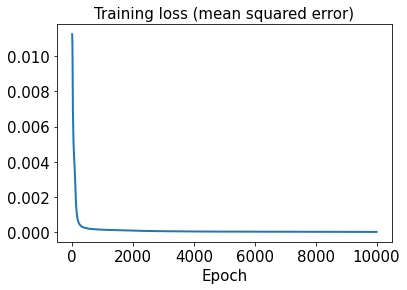

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

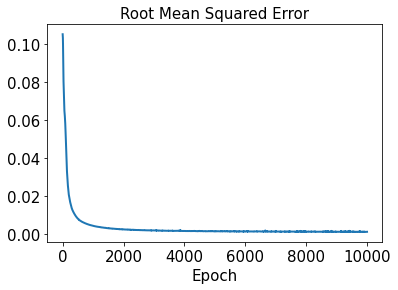

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

4/4 [==============================] - 0s 2ms/step - loss: 1.5585e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train_m2 = np.sum((sd.predict(x_train) - y_train)**2) / np.sum(y_train**2)
print(l2_error_train_m2)

9.374935e-05


In [54]:
l2_error_test_m2 = np.sum((sd.predict(x_test) - y_test)**2) / np.sum(y_test**2)
print(l2_error_test_m2)

0.0012497543


In [55]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.000118500386


In [56]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0026915716


In [57]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00023151044, 0.00011884012, 7.561827e-05, 0.00017289554, 8.071652e-05, 0.000115780356, 0.00011071881, 9.692479e-05, 0.0002913286, 0.00011263331, 8.337044e-05, 2.8108283e-05, 0.00012659999, 0.0001326165, 8.04958e-05, 0.0001326422, 0.00028360198, 3.687736e-05, 0.00027543987, 0.00014265675, 9.210585e-05, 0.00010169571, 8.999298e-05, 0.00014019379, 0.00016655725, 7.703923e-05, 0.00013313816, 3.9750837e-05, 9.3460876e-05, 4.3111533e-05, 0.0001301163, 8.0153055e-05, 4.0621504e-05, 0.00012961403, 9.858641e-05, 7.207292e-05, 7.924114e-05, 0.00015815414, 0.00010200288, 0.0004543362, 0.0001338351, 5.694659e-05, 0.00014017832, 7.8349876e-05, 0.0001353082, 0.00020614677, 7.0595604e-05, 9.219788e-05, 9.5054456e-05, 6.575722e-05, 7.969069e-05, 0.00017323693, 0.00019262849, 0.00014009853, 0.00026879265, 9.477944e-05, 5.3784643e-05, 0.00011876298, 0.0002233464, 5.910375e-05, 0.00012333009, 7.697587e-05, 9.8701945e-05, 0.00017779304, 9.3761875e-05, 0.00010713194, 0.00038407336, 5.552003e-05, 0.00011

In [58]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.00037107035, 0.0012017791, 0.0006890641, 0.00077588233, 0.00030599165, 0.01452121, 0.00063226174, 0.0015569819, 0.0005892611, 0.0011393526, 0.00040048332, 0.0053906334, 0.00045413172, 0.003379362, 0.00084982754, 0.0016281741, 0.00086857437, 0.00057773595, 0.001103773, 0.0034389645, 0.0043852464, 0.002429045, 0.0022330347, 0.0015930905, 0.0024272962, 0.00046518727, 0.00020267494, 0.0013288404, 0.0005596561, 0.011467542, 0.00065066485, 0.000816082, 0.0011479043, 0.013213645, 0.00029196352, 0.00074420904, 0.00026979478, 0.0035638497, 0.00046315315, 0.013892295, 0.003424594, 0.0035934842, 0.0018289244, 0.0007348496, 0.014498198]


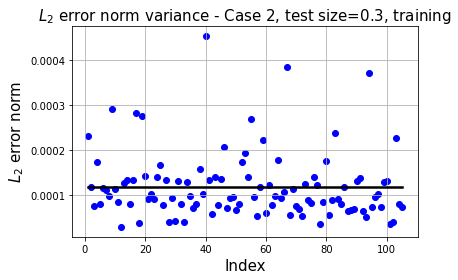

In [59]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

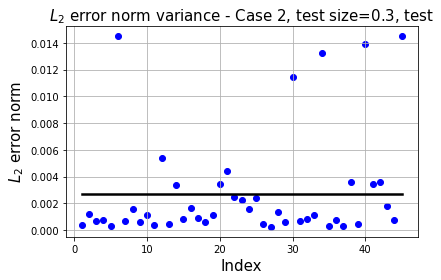

In [60]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

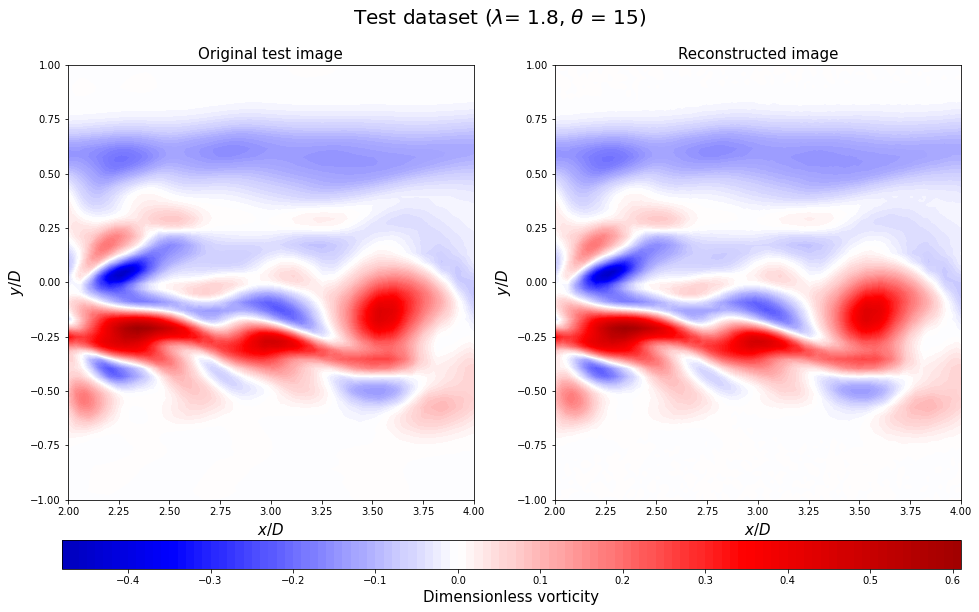

In [61]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

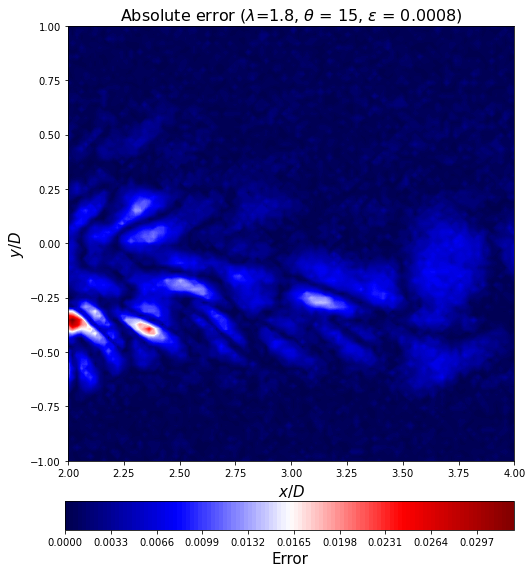

In [62]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()